# Problem Statement-: 
An airline company collects information on all passengers who have flown in their airlines and are interested to do an analysis of customer satisfaction.
They've recorded the satisfaction of the customer over several of their in-flight services.
As a solution specialist the client has approached you to analyse the data and arrive at solution using machine learning to predict the customer satisfaction rate.

# Import Data and Libraries

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
# Ignore Warings
warnings.filterwarnings('ignore')

In [5]:
# Import data
data=pd.read_csv('mark.csv')

In [6]:
data

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

Defining function Checking For counting of each rating with different categories and graph

In [8]:
def checking(i):
    print("According to Gender : \n")
    print(pd.crosstab(data['Gender'],data[i]))
    print()
    print("According to Customer Type : \n")
    print(pd.crosstab(data['Customer Type'],data[i]))
    print()
    print("According to Age : \n")
    print(pd.crosstab(data['Who'],data[i]))
    print()
    print("According to Type of Travel : \n")
    print(pd.crosstab(data['Type of Travel'],data[i]))
    print()
    print("According to Class : \n")
    print(pd.crosstab(data['Class'],data[i]))
    print()
    print("According to Satisfied/Dissatisfied : \n")
    print(pd.crosstab(data['Who'],data[i]))
    print()
    fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
    ax1.set_title('Number of  Males and Females',size=18,style='italic',weight='bold')
    ax2.set_title('Customer Type',size=18,style='italic',weight='bold')
    ax3.set_title('Number of Child,Adults,Older Adults',size=18,style='italic',weight='bold')
    ax4.set_title('Type of Travel',size=18,style='italic',weight='bold')
    ax5.set_title('Type of Class',size=18,style='italic',weight='bold')
    ax6.set_title('Satisfaction Rate',size=18,style='italic',weight='bold')
    ax1.plot(pd.crosstab(data[i],data['Gender']),marker='d')
    ax1.legend(data['Gender'].unique(),loc='best')
    ax2.plot(pd.crosstab(data[i],data['Customer Type']),marker='d')
    ax2.legend(data['Customer Type'].unique())
    ax3.plot(pd.crosstab(data[i],data['Who']),marker='d')
    ax3.legend(data['Who'].unique())
    ax4.plot(pd.crosstab(data[i],data['Type of Travel']),marker='d')
    ax4.legend(data['Type of Travel'].unique())
    ax5.plot(pd.crosstab(data[i],data['Class']),marker='d')
    ax5.legend(data['Class'].unique())
    ax6.plot(pd.crosstab(data['Inflight wifi service'],data['satisfaction']),marker='d')
    ax6.legend(data['satisfaction'].unique())
    plt.tight_layout()
    plt.show()

# Data Cleaning 

Data Info

In [11]:
df=pd.DataFrame(data)

sorting data by id

In [13]:
data.sort_values(by='id',inplace=True)

Deleting Column name : 'Unnamed: 0'

In [15]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Checking Duplicate Rows

In [17]:
data[data.duplicated()]

Empty DataFrame
Columns: [id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 24 columns]

Checking Null Values  

In [19]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Filling Null Values

In [21]:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

In [22]:
data['Arrival Delay in Minutes'].isna().sum()

0

Checking Data type

In [24]:
data['Arrival Delay in Minutes'].dtype

dtype('float64')

Changing data type into int64 from float64

In [26]:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].astype('int64')


In [27]:
data['Arrival Delay in Minutes'].info()

<class 'pandas.core.series.Series'>
Index: 103904 entries, 90131 to 46770
Series name: Arrival Delay in Minutes
Non-Null Count   Dtype
--------------   -----
103904 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


Replacing Column data of Satisfaction as [0,1] 

In [29]:
data['satisfaction']=data['satisfaction'].replace('neutral or dissatisfied',0)

In [30]:
data['satisfaction']=data['satisfaction'].replace('satisfied',1)

In [31]:
data['satisfaction']

90131    0
47865    1
44425    1
96450    1
72524    1
        ..
97767    0
53459    0
32973    0
82052    1
46770    0
Name: satisfaction, Length: 103904, dtype: int64

# Data Analysing

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 90131 to 46770
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type of Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight Distance                    103904 non-null  int64 
 7   Inflight wifi service              103904 non-null  int64 
 8   Departure/Arrival time convenient  103904 non-null  int64 
 9   Ease of Online booking             103904 non-null  int64 
 10  Gate location                      103904 non-null  int64 
 11  Food and drink                     103904 non-null  in

In [34]:
data.head(10)

id  Gender      Customer Type  Age   Type of Travel     Class  \
90131   1    Male  disloyal Customer   48  Business travel  Business   
47865   2  Female     Loyal Customer   35  Business travel  Business   
44425   3    Male     Loyal Customer   41  Business travel  Business   
96450   4    Male     Loyal Customer   50  Business travel  Business   
72524   5  Female     Loyal Customer   49  Business travel  Business   
81831   6    Male     Loyal Customer   43  Business travel  Business   
39958   7    Male     Loyal Customer   43  Business travel  Business   
4119    8  Female     Loyal Customer   60  Business travel  Business   
41370   9    Male     Loyal Customer   50  Business travel  Business   
86170  10  Female     Loyal Customer   38  Business travel  Business   

       Flight Distance  Inflight wifi service  \
90131              821                      3   
47865              821                      2   
44425              853                      4   
96450             1905                      2   
72524             3470                      3   
81831             3788                      4   
39958             1963                      3   
4119               853                      4   
41370             2607                      4   
86170             2822                      2   

       Departure/Arrival time convenient  Ease of Online booking  ...  \
90131                                  3                       3  ...   
47865                                  2                       2  ...   
44425                                  4                       4  ...   
96450                                  2                       2  ...   
72524                                  3                       3  ...   
81831                                  4                       4  ...   
39958                                  3                       3  ...   
4119                                   3                       4  ...   
41370                                  1                       1  ...   
86170                                  2                       5  ...   

       Inflight entertainment  On-board service  Leg room service  \
90131                       5                 3                 2   
47865                       5                 5                 5   
44425                       3                 3                 3   
96450                       5                 5                 5   
72524                       3                 3                 4   
81831                       4                 4                 4   
39958                       5                 5                 5   
4119                        3                 3                 4   
41370                       4                 4                 4   
86170                       5                 5                 5   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
90131                 5                4                 5            5   
47865                 5                3                 5            5   
44425                 3                4                 3            5   
96450                 5                3                 5            4   
72524                 3                3                 3            5   
81831                 4                3                 4            3   
39958                 5                4                 5            4   
4119                  3                3                 3            4   
41370                 4                3                 4            3   
86170                 5                3                 5            4   

       Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
90131                           2                         5             0  
47865                          26                        39             1  
44425                           0                       

In [35]:
data.tail(10)

id  Gender      Customer Type  Age   Type of Travel     Class  \
93261  129867  Female  disloyal Customer   20  Business travel       Eco   
55369  129869  Female  disloyal Customer   18  Business travel       Eco   
95107  129870    Male  disloyal Customer   20  Business travel       Eco   
53017  129871  Female  disloyal Customer   23  Business travel  Business   
57561  129873  Female     Loyal Customer   44  Personal Travel  Eco Plus   
97767  129874  Female     Loyal Customer   28  Personal Travel  Eco Plus   
53459  129875  Female     Loyal Customer   55  Personal Travel  Eco Plus   
32973  129878    Male     Loyal Customer   42  Personal Travel  Eco Plus   
82052  129879    Male     Loyal Customer   50  Personal Travel  Eco Plus   
46770  129880  Female     Loyal Customer   20  Personal Travel  Eco Plus   

       Flight Distance  Inflight wifi service  \
93261              447                      4   
55369              337                      2   
95107              447                      2   
53017              337                      2   
57561              308                      3   
97767              337                      4   
53459              308                      3   
32973              337                      2   
82052              337                      5   
46770              337                      3   

       Departure/Arrival time convenient  Ease of Online booking  ...  \
93261                                  0                       4  ...   
55369                                  0                       2  ...   
95107                                  2                       2  ...   
53017                                  2                       2  ...   
57561                                  4                       3  ...   
97767                                  2                       4  ...   
53459                                  4                       3  ...   
32973                                  5                       2  ...   
82052                                  4                       4  ...   
46770                                  1                       3  ...   

       Inflight entertainment  On-board service  Leg room service  \
93261                       4                 3                 3   
55369                       5                 4                 4   
95107                       4                 2                 4   
53017                       5                 2                 1   
57561                       3                 3                 3   
97767                       3                 1                 5   
53459                       4                 4                 3   
32973                       3                 3                 4   
82052                       3                 4                 5   
46770                       2                 4                 4   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
93261                 4                4                 5            4   
55369                 4                4                 4            5   
95107                 2                2                 2            4   
53017                 4                2                 4            5   
57561                 3                3                 3            5   
97767                 3                4                 4            3   
53459                 4                4                 4            4   
32973                 5                4                 4            3   
82052                 5                3                 4            3   
46770                 1                4                 2            2   

       Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
93261                           0                         4             1  
55369                           0                         0             0  
95107           

In [36]:
data['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [37]:
data['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [38]:
who=[]
for i in data.index:
    if(data.loc[i,'Age']<=18):
        who.append('Child')
    elif(data.loc[i,'Age']>18) and (data.loc[i,'Age']<=64):
        who.append('Adult')
    else:
        who.append('Older_Adult')
data.insert(4,'Who',who)

In [39]:
data['Who'].value_counts()

Who
Adult          90247
Child           8909
Older_Adult     4748
Name: count, dtype: int64

In [40]:
data['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [41]:
data['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [42]:
data['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

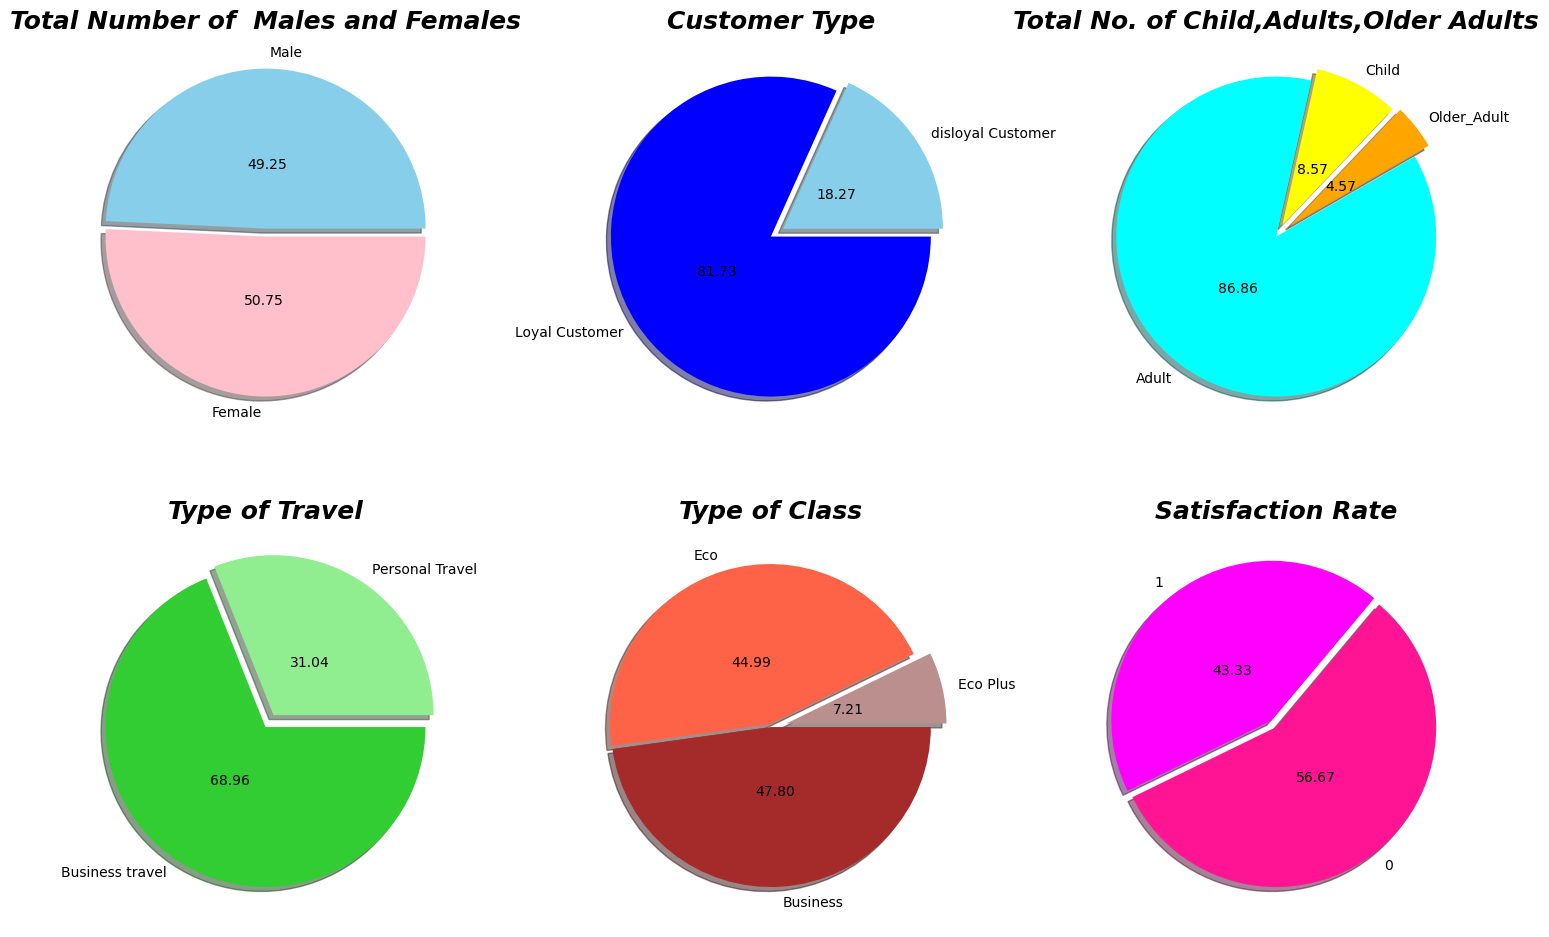

In [43]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(15,10))
ax1.set_title('Total Number of  Males and Females',size=18,style='italic',weight='bold')
ax2.set_title('Customer Type',size=18,style='italic',weight='bold')
ax3.set_title('Total No. of Child,Adults,Older Adults',size=18,style='italic',weight='bold')
ax4.set_title('Type of Travel',size=18,style='italic',weight='bold')
ax5.set_title('Type of Class',size=18,style='italic',weight='bold')
ax6.set_title('Satisfaction Rate',size=18,style='italic',weight='bold')
ax1.pie(data['Gender'].value_counts(),
       labels=data['Gender'].value_counts().index,colors=['Pink','SkyBlue'],
         explode=[0,.05],shadow=True,
       autopct='%.2f',counterclock=False,pctdistance=0.4)
# ax1.legend(data['Gender'],loc=2)
ax2.pie(data['Customer Type'].value_counts(),
       labels=data['Customer Type'].value_counts().index,colors=['Blue','SkyBlue',],
        explode=[0,.09],shadow=True,
       autopct='%.2f',counterclock=False,pctdistance=0.4)
# ax2.legend(data['Customer Type'],loc=2)
ax3.pie(data['Who'].value_counts(),
       labels=data['Who'].value_counts().index,colors=['cyan','yellow','orange'],
        explode=[0,0.08,0.11],shadow=True,startangle=30,counterclock=False,
       autopct='%.2f',pctdistance=0.4)
# ax3.legend(data['Who'])
ax4.pie(data['Type of Travel'].value_counts(),
        labels=data['Type of Travel'].value_counts().index,colors=['limegreen','lightgreen'],
        explode=[0,.09],shadow=True,
       autopct='%.2f',counterclock=False,pctdistance=0.4)
# ax4.legend(data['Type of Travel'],loc=2)
ax5.pie(data['Class'].value_counts(),
       labels=data['Class'].value_counts().index,colors=['brown','tomato','rosybrown'],
        explode=[0,0.02,0.1],shadow=True,startangle=0,counterclock=False,
       autopct='%.2f',pctdistance=0.4)
# ax5.legend(data['Class'],loc=1)
ax6.pie(data['satisfaction'].value_counts(),
       labels=data['satisfaction'].value_counts().index,colors=['deeppink','magenta'],
        explode=[0,0.05],shadow=True,startangle=50,counterclock=False,
       autopct='%.2f',pctdistance=0.4)
# ax6.legend(data['satisfaction'],loc=1)
plt.tight_layout()
plt.show()

# Average Rating of Services provided by Airlines

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 90131 to 46770
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Who                                103904 non-null  object
 5   Type of Travel                     103904 non-null  object
 6   Class                              103904 non-null  object
 7   Flight Distance                    103904 non-null  int64 
 8   Inflight wifi service              103904 non-null  int64 
 9   Departure/Arrival time convenient  103904 non-null  int64 
 10  Ease of Online booking             103904 non-null  int64 
 11  Gate location                      103904 non-null  in

In [46]:
services=data.iloc[:,8:22]
services

Inflight wifi service  Departure/Arrival time convenient  \
90131                      3                                  3   
47865                      2                                  2   
44425                      4                                  4   
96450                      2                                  2   
72524                      3                                  3   
...                      ...                                ...   
97767                      4                                  2   
53459                      3                                  4   
32973                      2                                  5   
82052                      5                                  4   
46770                      3                                  1   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
90131                       3              3               5                3   
47865                       2              2               3                5   
44425                       4              4               5                5   
96450                       2              2               4                4   
72524                       3              3               4                5   
...                       ...            ...             ...              ...   
97767                       4              4               3                4   
53459                       3              4               2                4   
32973                       2              1               3                2   
82052                       4              1               3                4   
46770                       3              2               2                3   

       Seat comfort  Inflight entertainment  On-board service  \
90131             5                       5                 3   
47865             4                       5                 5   
44425             5                       3                 3   
96450             5                       5                 5   
72524             4                       3                 3   
...             ...                     ...               ...   
97767             3                       3                 1   
53459             3                       4                 4   
32973             3                       3                 3   
82052             4                       3                 4   
46770             2                       2                 4   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
90131                 2                 5                4                 5   
47865                 5                 5                3                 5   
44425                 3                 3                4                 3   
96450                 5                 5                3                 5   
72524                 4                 3                3                 3   
...                 ...               ...              ...               ...   
97767                 5                 3                4                 4   
53459                 3                 4                4                 4   
32973                 4                 5                4                 4   
82052                 5                 5                3                 4   
46770                 4                 1                4                 2   

       Cleanliness  
90131            5  
47865            5  
44425            5  
96450            4  
72524            5  
...            ...  
97767            3  
53459            4  
32973            3  
82052            3  
46770            2  

[103904 rows x 14 columns]

In [47]:
round(services.mean(),2).sort_values(ascending=False)

Inflight service                     3.64
Baggage handling                     3.63
Seat comfort                         3.44
On-board service                     3.38
Inflight entertainment               3.36
Leg room service                     3.35
Checkin service                      3.30
Cleanliness                          3.29
Online boarding                      3.25
Food and drink                       3.20
Departure/Arrival time convenient    3.06
Gate location                        2.98
Ease of Online booking               2.76
Inflight wifi service                2.73
dtype: float64

In [48]:
round(services.median(),2).sort_values(ascending=False)

Seat comfort                         4.0
Inflight entertainment               4.0
On-board service                     4.0
Leg room service                     4.0
Baggage handling                     4.0
Inflight service                     4.0
Inflight wifi service                3.0
Departure/Arrival time convenient    3.0
Ease of Online booking               3.0
Gate location                        3.0
Food and drink                       3.0
Online boarding                      3.0
Checkin service                      3.0
Cleanliness                          3.0
dtype: float64

In [49]:
round(services.std(),2).sort_values(ascending=False)

Departure/Arrival time convenient    1.53
Ease of Online booking               1.40
Online boarding                      1.35
Inflight wifi service                1.33
Food and drink                       1.33
Inflight entertainment               1.33
Seat comfort                         1.32
Leg room service                     1.32
Cleanliness                          1.31
On-board service                     1.29
Gate location                        1.28
Checkin service                      1.27
Baggage handling                     1.18
Inflight service                     1.18
dtype: float64

In [50]:
round(services.skew(),2).sort_values(ascending=False)

Inflight wifi service                0.04
Ease of Online booking              -0.02
Gate location                       -0.06
Food and drink                      -0.15
Cleanliness                         -0.30
Departure/Arrival time convenient   -0.33
Leg room service                    -0.35
Checkin service                     -0.36
Inflight entertainment              -0.37
On-board service                    -0.42
Online boarding                     -0.45
Seat comfort                        -0.48
Baggage handling                    -0.68
Inflight service                    -0.69
dtype: float64

In [51]:
round(services.kurtosis(),2).sort_values(ascending=False)

Inflight service                    -0.36
Baggage handling                    -0.39
Online boarding                     -0.70
Checkin service                     -0.83
Inflight wifi service               -0.85
On-board service                    -0.89
Ease of Online booking              -0.91
Seat comfort                        -0.93
Leg room service                    -0.98
Cleanliness                         -1.01
Gate location                       -1.03
Departure/Arrival time convenient   -1.04
Inflight entertainment              -1.06
Food and drink                      -1.15
dtype: float64

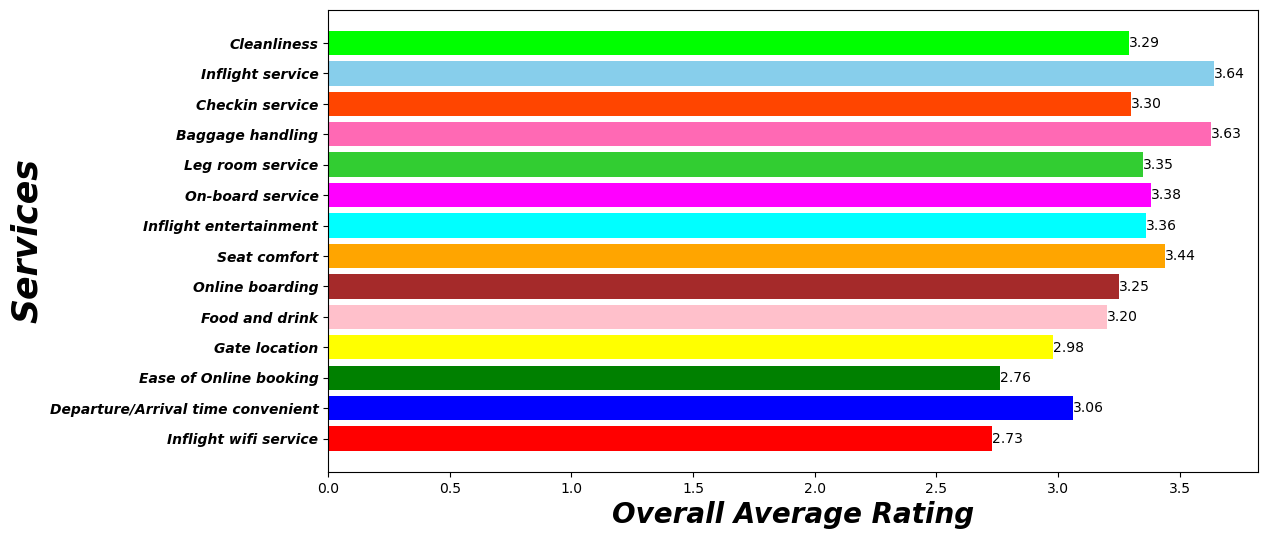

In [52]:
plt.figure(figsize=(12,6))
a1=plt.barh(data.columns[8:22],
         round(data.iloc[0:,8:22].mean(),2),
        color=['red','blue','green','yellow','pink','brown','orange','cyan','magenta','limegreen','hotpink','orangered','skyblue','lime'])
plt.yticks(size = 10,style = 'italic',weight = 'bold',)
plt.ylabel('Services',size = 25,style = 'italic',weight = 'bold',)
plt.xlabel('Overall Average Rating',size = 20,style = 'italic',weight = 'bold')
plt.bar_label(a1,fmt='%.2f')
plt.show()

In [53]:
round(services.describe(),2)

Inflight wifi service  Departure/Arrival time convenient  \
count              103904.00                          103904.00   
mean                    2.73                               3.06   
std                     1.33                               1.53   
min                     0.00                               0.00   
25%                     2.00                               2.00   
50%                     3.00                               3.00   
75%                     4.00                               4.00   
max                     5.00                               5.00   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count               103904.00      103904.00       103904.00        103904.00   
mean                     2.76           2.98            3.20             3.25   
std                      1.40           1.28            1.33             1.35   
min                      0.00           0.00            0.00             0.00   
25%                      2.00           2.00            2.00             2.00   
50%                      3.00           3.00            3.00             3.00   
75%                      4.00           4.00            4.00             4.00   
max                      5.00           5.00            5.00             5.00   

       Seat comfort  Inflight entertainment  On-board service  \
count     103904.00               103904.00         103904.00   
mean           3.44                    3.36              3.38   
std            1.32                    1.33              1.29   
min            0.00                    0.00              0.00   
25%            2.00                    2.00              2.00   
50%            4.00                    4.00              4.00   
75%            5.00                    4.00              4.00   
max            5.00                    5.00              5.00   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count         103904.00         103904.00        103904.00         103904.00   
mean               3.35              3.63             3.30              3.64   
std                1.32              1.18             1.27              1.18   
min                0.00              1.00             0.00              0.00   
25%                2.00              3.00             3.00              3.00   
50%                4.00              4.00             3.00              4.00   
75%                4.00              5.00             4.00              5.00   
max                5.00              5.00             5.00              5.00   

       Cleanliness  
count    103904.00  
mean          3.29  
std           1.31  
min           0.00  
25%           2.00  
50%           3.00  
75%           4.00  
max           5.00

# Inflight wifi service

According to Gender : 

Inflight wifi service     0     1      2      3     4     5
Gender                                                     
Female                 1592  9089  13249  13175  9913  5709
Male                   1511  8751  12581  12693  9881  5760

According to Customer Type : 

Inflight wifi service     0      1      2      3      4     5
Customer Type                                                
Loyal Customer         2410  14848  21004  20984  15978  9699
disloyal Customer       693   2992   4826   4884   3816  1770

According to Age : 

Inflight wifi service     0      1      2      3      4      5
Who                                                           
Adult                  2801  15413  21958  21938  17484  10653
Child                   212   1546   2528   2570   1501    552
Older_Adult              90    881   1344   1360    809    264

According to Type of Travel : 

Inflight wifi service     0      1      2      3      4      5
Type of Travel         

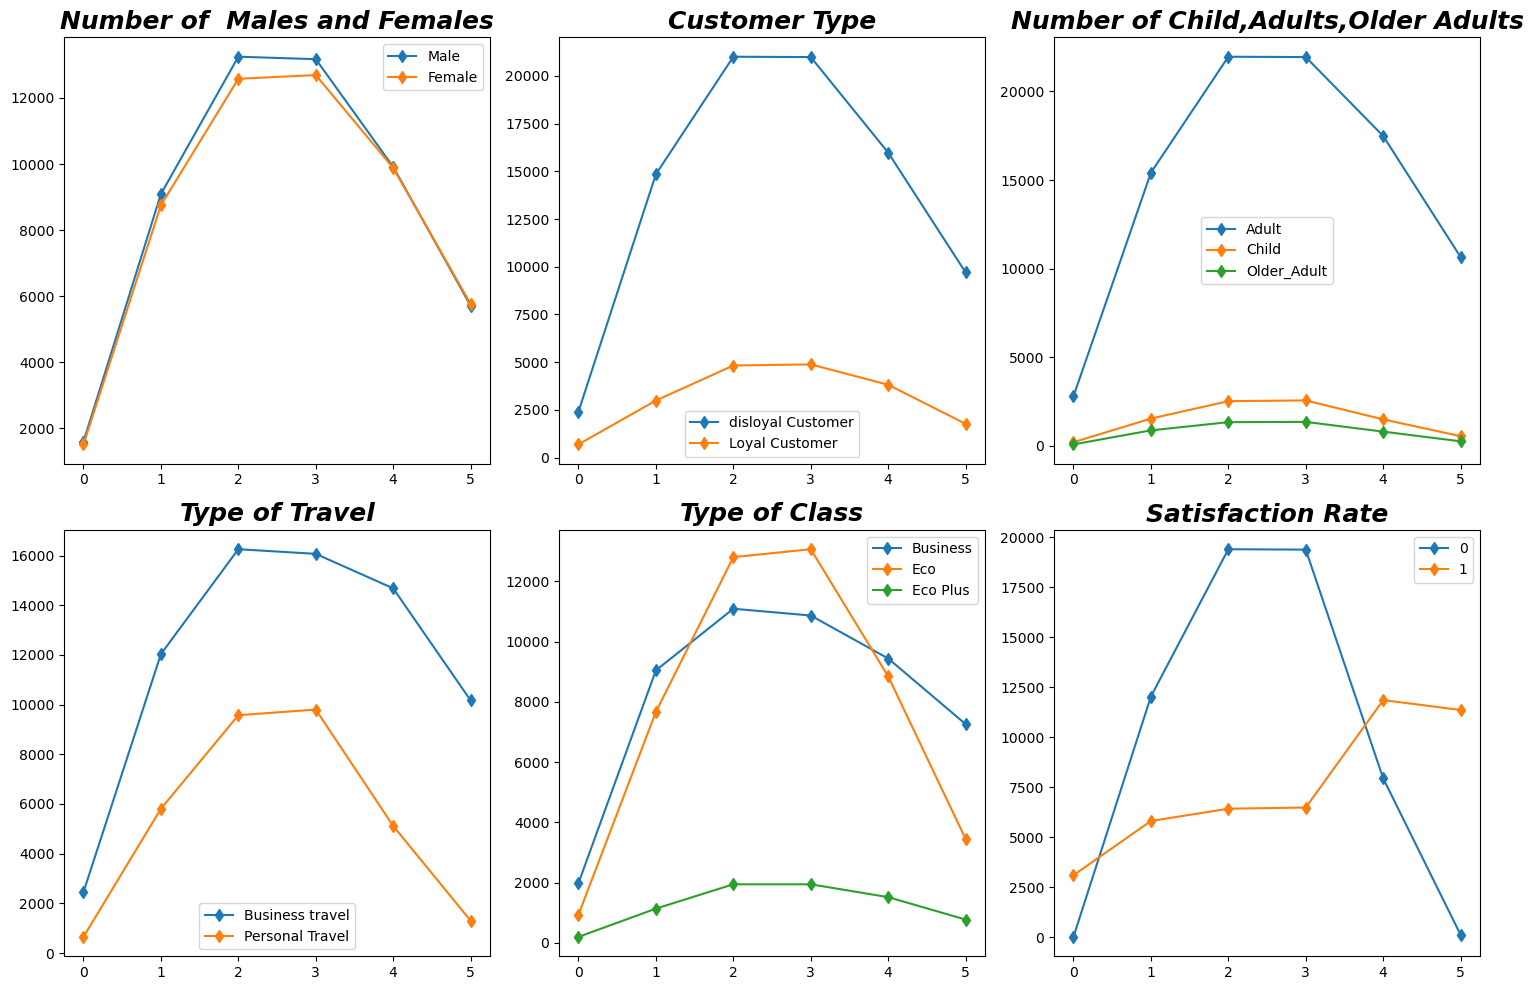

In [55]:
checking('Inflight wifi service')

# Departure/Arrival time convenient

According to Gender : 

Departure/Arrival time convenient     0     1     2     3      4      5
Gender                                                                 
Female                             2770  7866  8829  9155  12888  11219
Male                               2530  7632  8362  8811  12658  11184

According to Customer Type : 

Departure/Arrival time convenient     0      1      2      3      4      5
Customer Type                                                             
Loyal Customer                     2032  12950  13322  14067  21999  20553
disloyal Customer                  3268   2548   3869   3899   3547   1850

According to Age : 

Departure/Arrival time convenient     0      1      2      3      4      5
Who                                                                       
Adult                              4772  13895  15357  15933  21488  18802
Child                               390   1013   1192   1331   2640   2343
Older_Adult                       

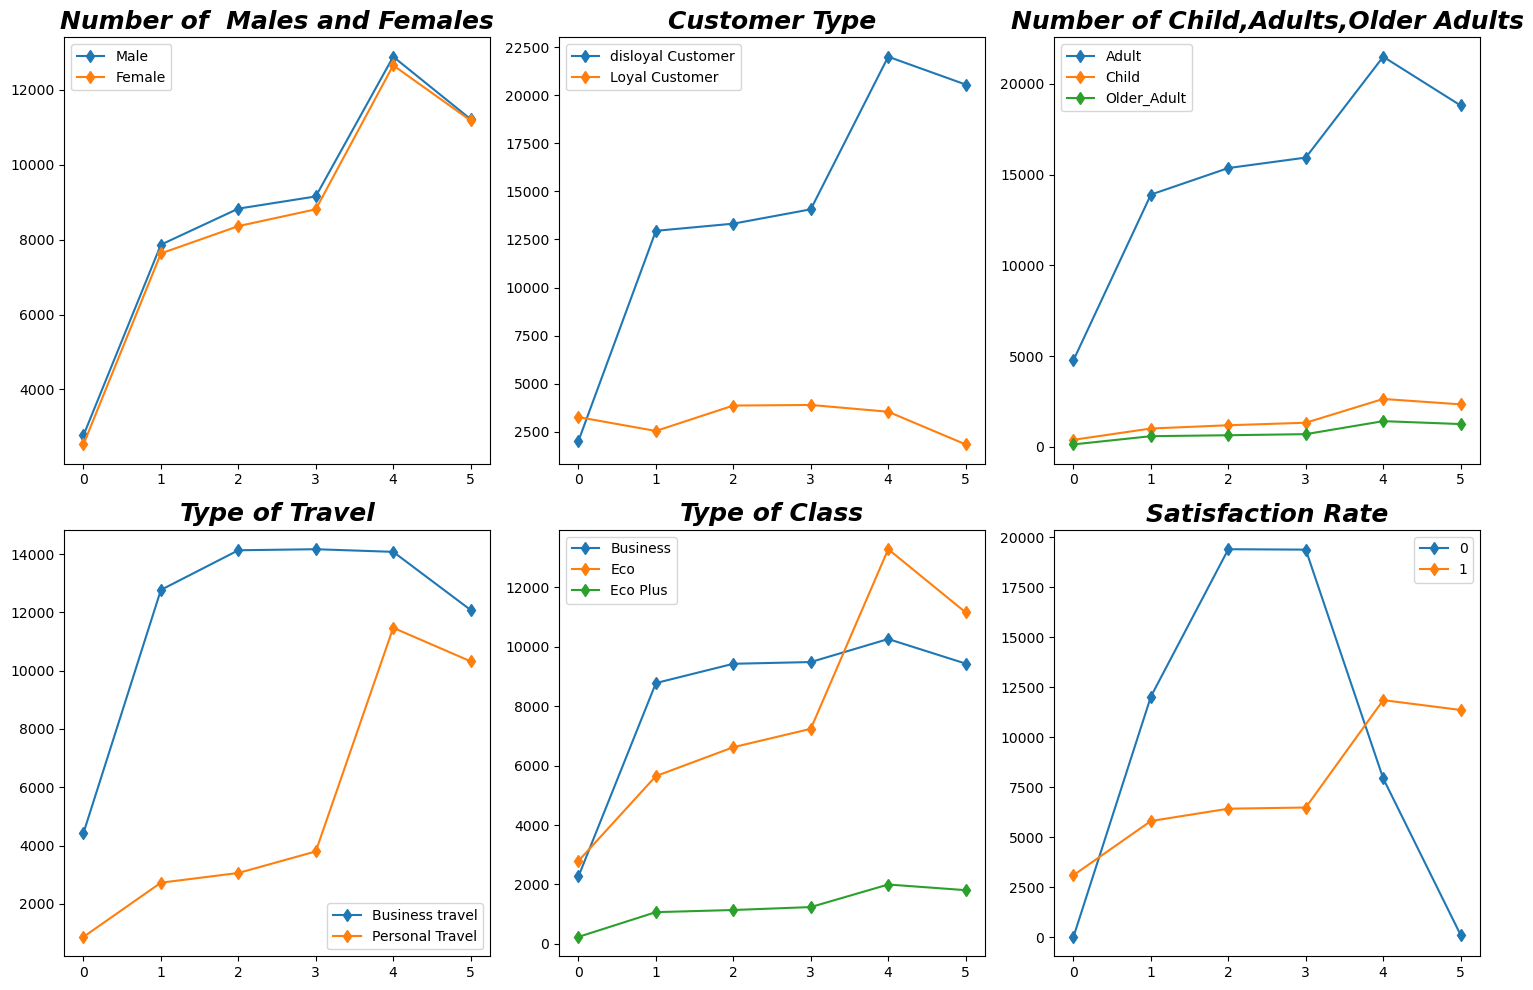

In [57]:
checking('Departure/Arrival time convenient')

# Ease of Online booking

According to Gender : 

Ease of Online booking     0     1      2      3     4     5
Gender                                                      
Female                  2298  8925  12345  12373  9806  6980
Male                    2189  8600  11676  12076  9765  6871

According to Customer Type : 

Ease of Online booking     0      1      2      3      4      5
Customer Type                                                  
Loyal Customer          3630  14562  19328  19599  15815  11989
disloyal Customer        857   2963   4693   4850   3756   1862

According to Age : 

Ease of Online booking     0      1      2      3      4      5
Who                                                            
Adult                   3804  15226  20498  20871  17240  12608
Child                    466   1476   2330   2371   1492    774
Older_Adult              217    823   1193   1207    839    469

According to Type of Travel : 

Ease of Online booking     0      1      2      3      4      5
Type 

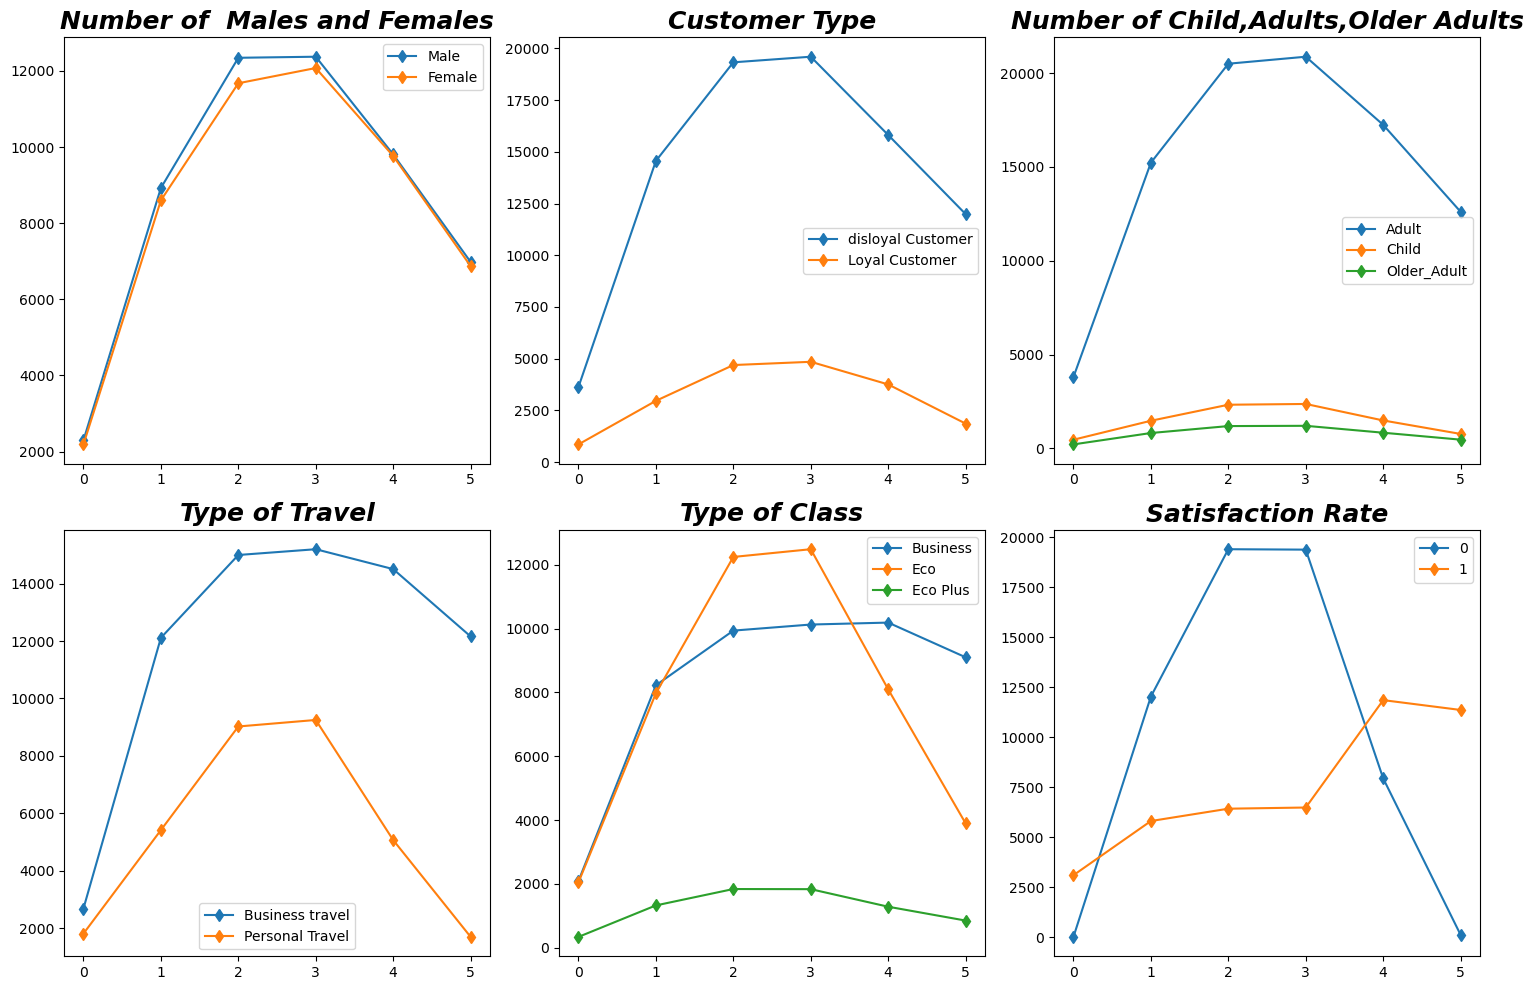

In [59]:
checking('Ease of Online booking')

# Gate location

According to Gender : 

Gate location  0     1     2      3      4     5
Gender                                          
Female         1  8846  9855  14629  12483  6913
Male           0  8716  9604  13948  11943  6966

According to Customer Type : 

Gate location      0      1      2      3      4      5
Customer Type                                          
Loyal Customer     1  14975  16427  21953  19029  12538
disloyal Customer  0   2587   3032   6624   5397   1341

According to Age : 

Gate location  0      1      2      3      4      5
Who                                                
Adult          1  15470  17005  24224  20979  12568
Child          0   1300   1540   2958   2334    777
Older_Adult    0    792    914   1395   1113    534

According to Type of Travel : 

Gate location    0      1      2      3      4      5
Type of Travel                                       
Business travel  1  12807  13627  17342  16283  11595
Personal Travel  0   4755   5832  11235   8143 

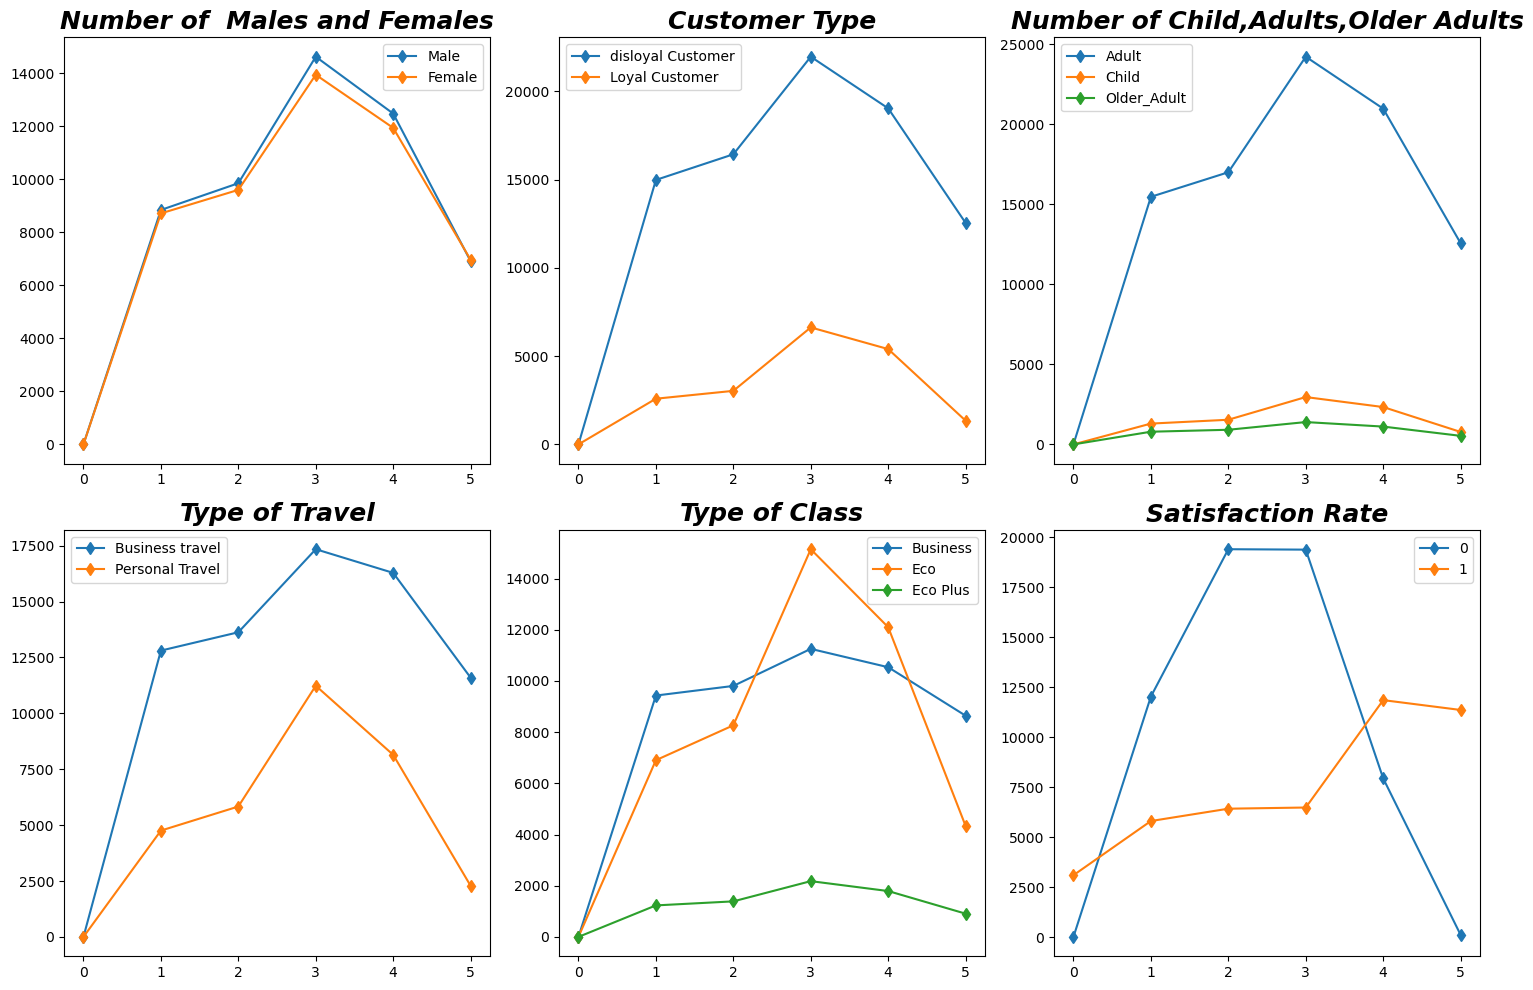

In [61]:
checking('Gate location')

# Food and drink

According to Gender : 

Food and drink   0     1      2      3      4      5
Gender                                              
Female          57  6528  11261  11453  12109  11319
Male            50  6309  10727  10847  12250  10994

According to Customer Type : 

Food and drink      0     1      2      3      4      5
Customer Type                                          
Loyal Customer     83  9467  18052  18331  20406  18584
disloyal Customer  24  3370   3936   3969   3953   3729

According to Age : 

Food and drink   0      1      2      3      4      5
Who                                                  
Adult           84  10687  19032  19348  21347  19749
Child           19   1466   1895   1901   1996   1632
Older_Adult      4    684   1061   1051   1016    932

According to Type of Travel : 

Food and drink    0     1      2      3      4      5
Type of Travel                                       
Business travel  55  7811  15008  15286  17657  15838
Personal Travel  52  

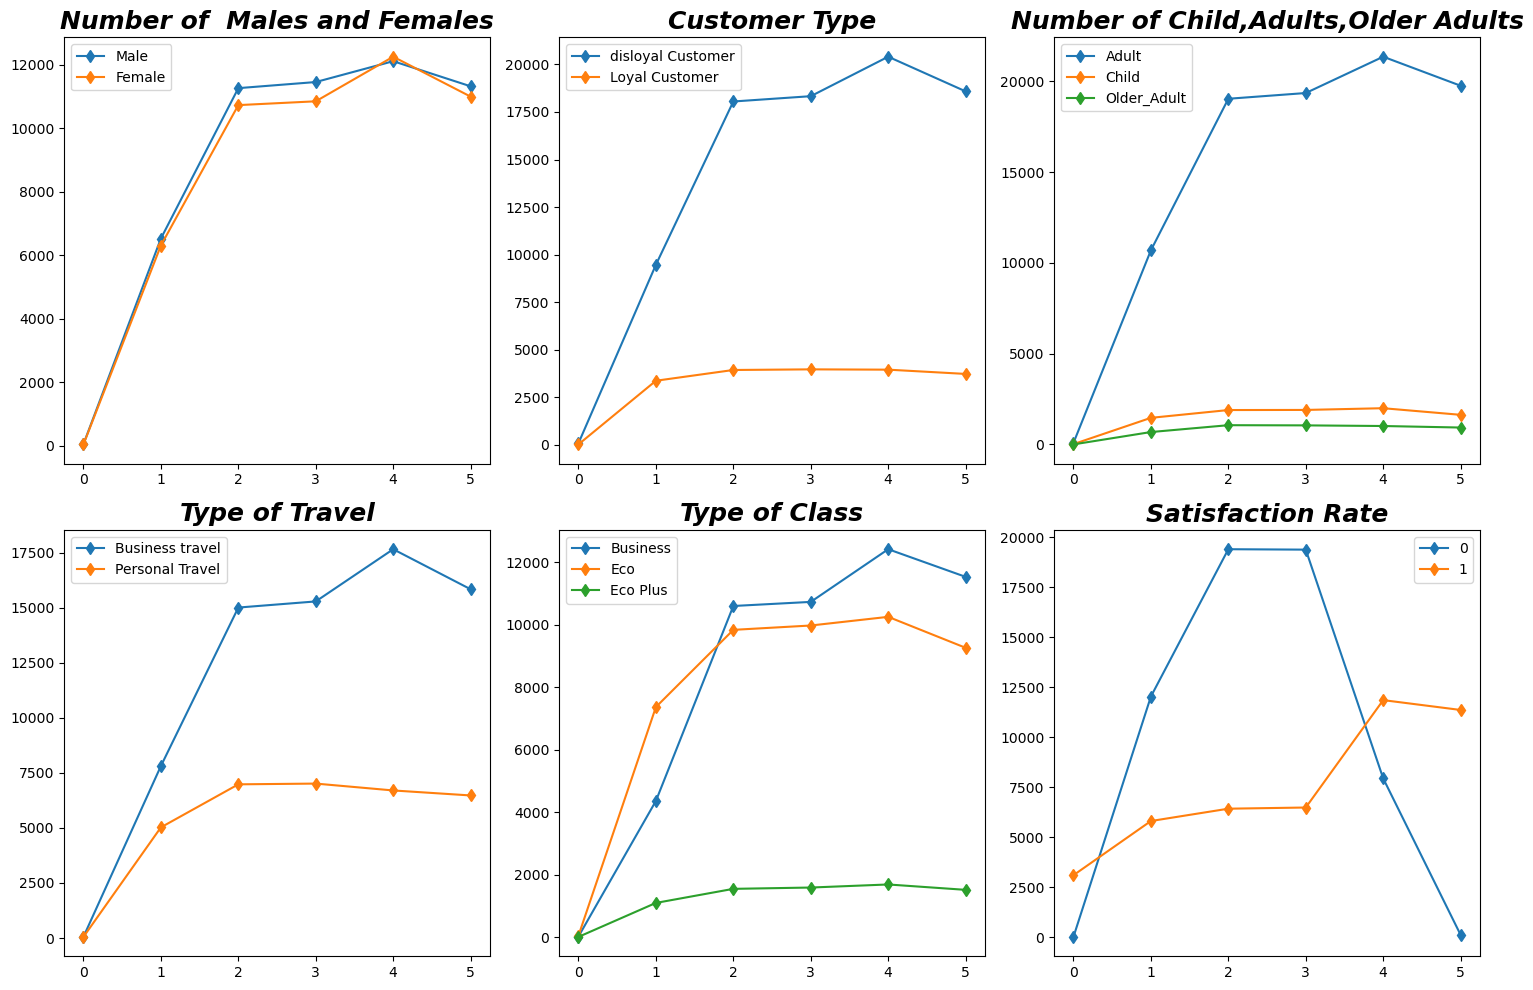

In [63]:
checking('Food and drink')

# Online boarding

According to Gender : 

Online boarding     0     1     2      3      4      5
Gender                                                
Female           1098  5103  8360  11069  16170  10927
Male             1330  5589  9145  10735  14592   9786

According to Customer Type : 

Online boarding       0     1      2      3      4      5
Customer Type                                            
Loyal Customer     1609  7688  12873  16967  26979  18807
disloyal Customer   819  3004   4632   4837   3783   1906

According to Age : 

Online boarding     0     1      2      3      4      5
Who                                                    
Adult            1898  8781  14372  18188  27734  19274
Child             442  1408   2309   2357   1665    728
Older_Adult        88   503    824   1259   1363    711

According to Type of Travel : 

Online boarding     0     1      2      3      4      5
Type of Travel                                         
Business travel  1092  6125  10106  13349  23

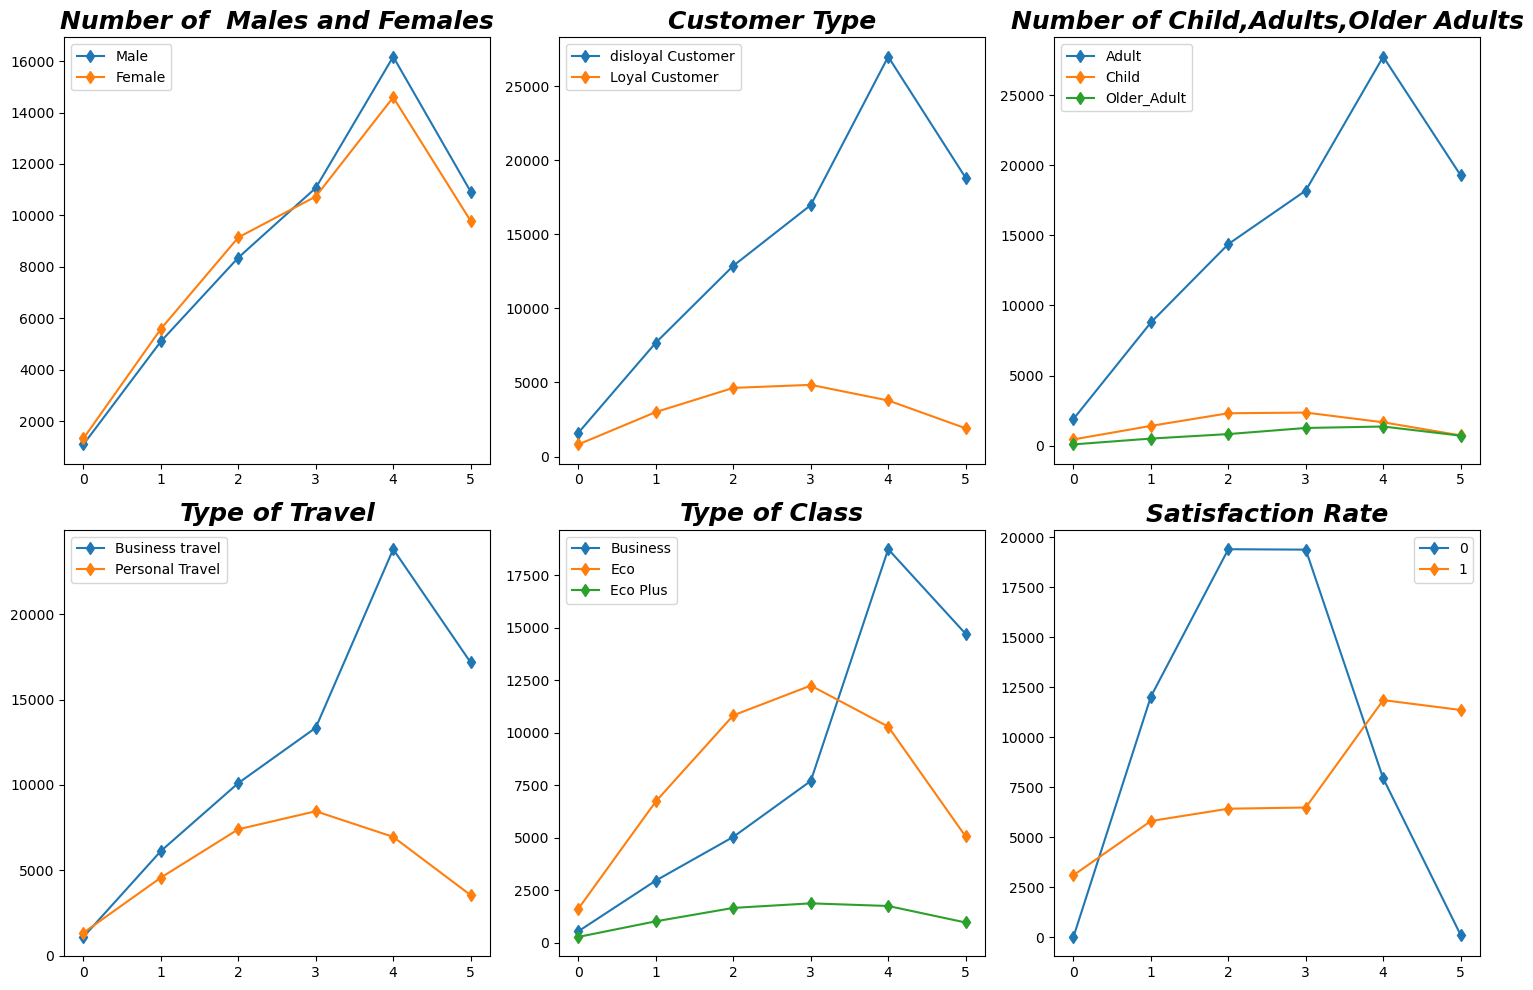

In [65]:
checking('Online boarding')

# Inflight entertainment

According to Gender : 

Inflight entertainment  0     1     2     3      4      5
Gender                                                   
Female                  7  6383  9041  9777  14749  12770
Male                    7  6095  8596  9362  14674  12443

According to Customer Type : 

Inflight entertainment   0     1      2      3      4      5
Customer Type                                               
Loyal Customer          14  9090  13794  15158  25419  21448
disloyal Customer        0  3388   3843   3981   4004   3765

According to Age : 

Inflight entertainment   0      1      2      3      4      5
Who                                                          
Adult                   12  10284  14807  16198  26273  22673
Child                    2   1454   1842   1903   2028   1680
Older_Adult              0    740    988   1038   1122    860

According to Type of Travel : 

Inflight entertainment   0     1      2      3      4      5
Type of Travel                            

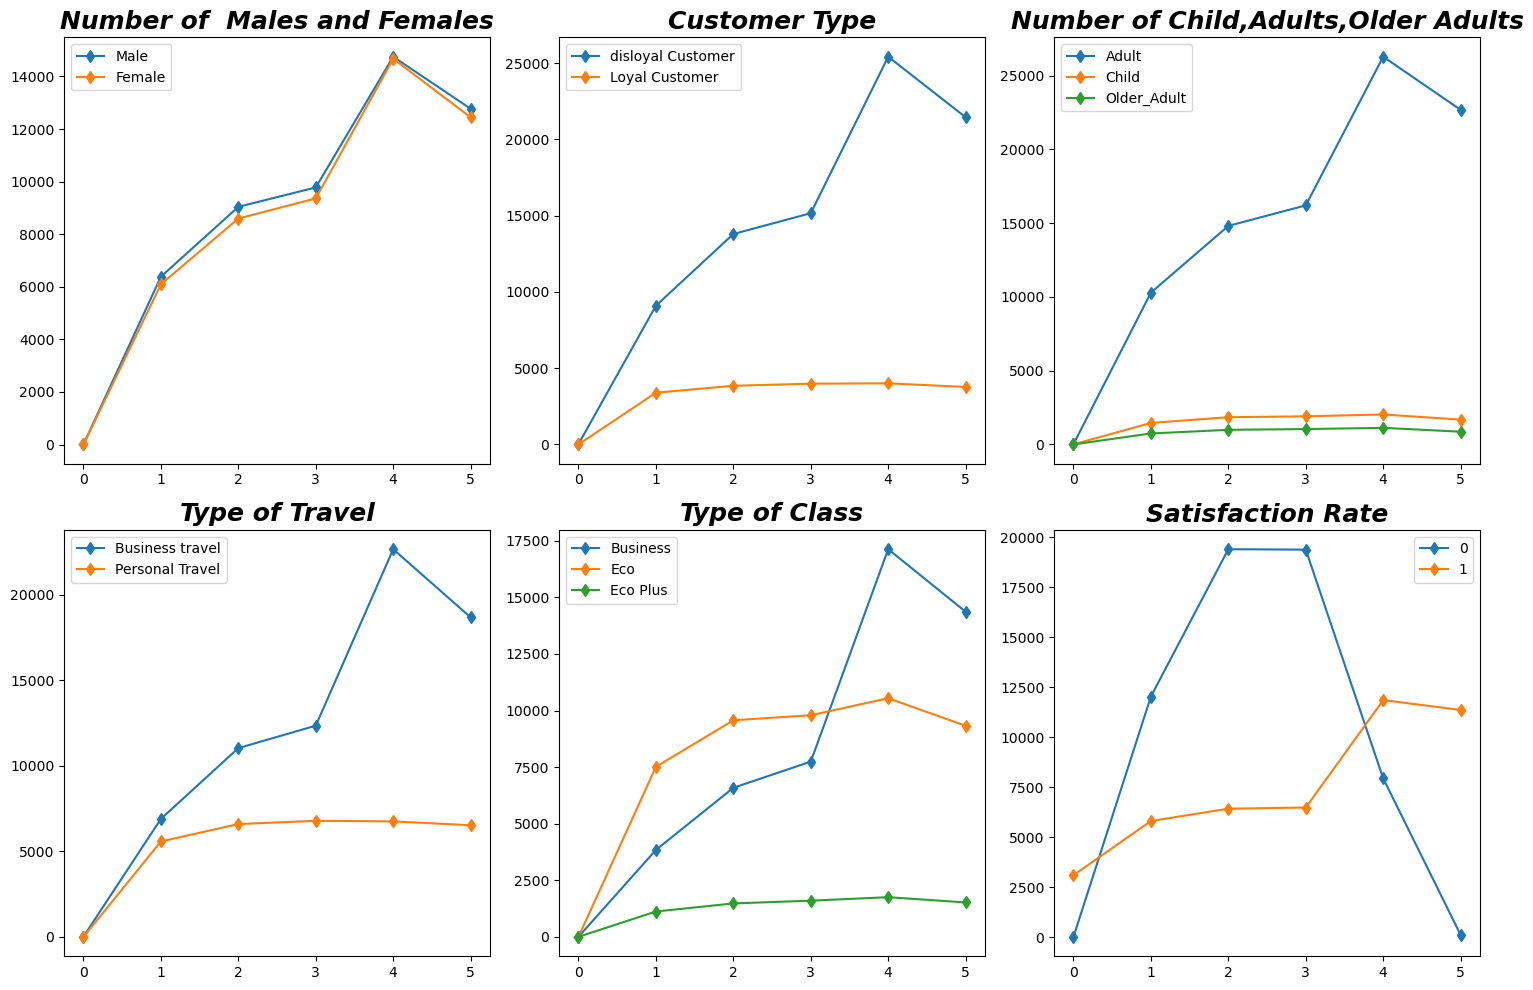

In [67]:
checking('Inflight entertainment')

# On-board service

According to Gender : 

On-board service  0     1     2      3      4      5
Gender                                              
Female            2  6059  7811  11381  15398  12076
Male              1  5813  6870  11452  15469  11572

According to Customer Type : 

On-board service   0     1      2      3      4      5
Customer Type                                         
Loyal Customer     3  9299  12042  17696  25720  20163
disloyal Customer  0  2573   2639   5137   5147   3485

According to Age : 

On-board service  0     1      2      3      4      5
Who                                                  
Adult             3  9923  12555  19225  27300  21241
Child             0  1231   1235   2476   2410   1557
Older_Adult       0   718    891   1132   1157    850

According to Type of Travel : 

On-board service  0     1      2      3      4      5
Type of Travel                                       
Business travel   3  7641  10168  14411  22505  16927
Personal Travel   0  4231

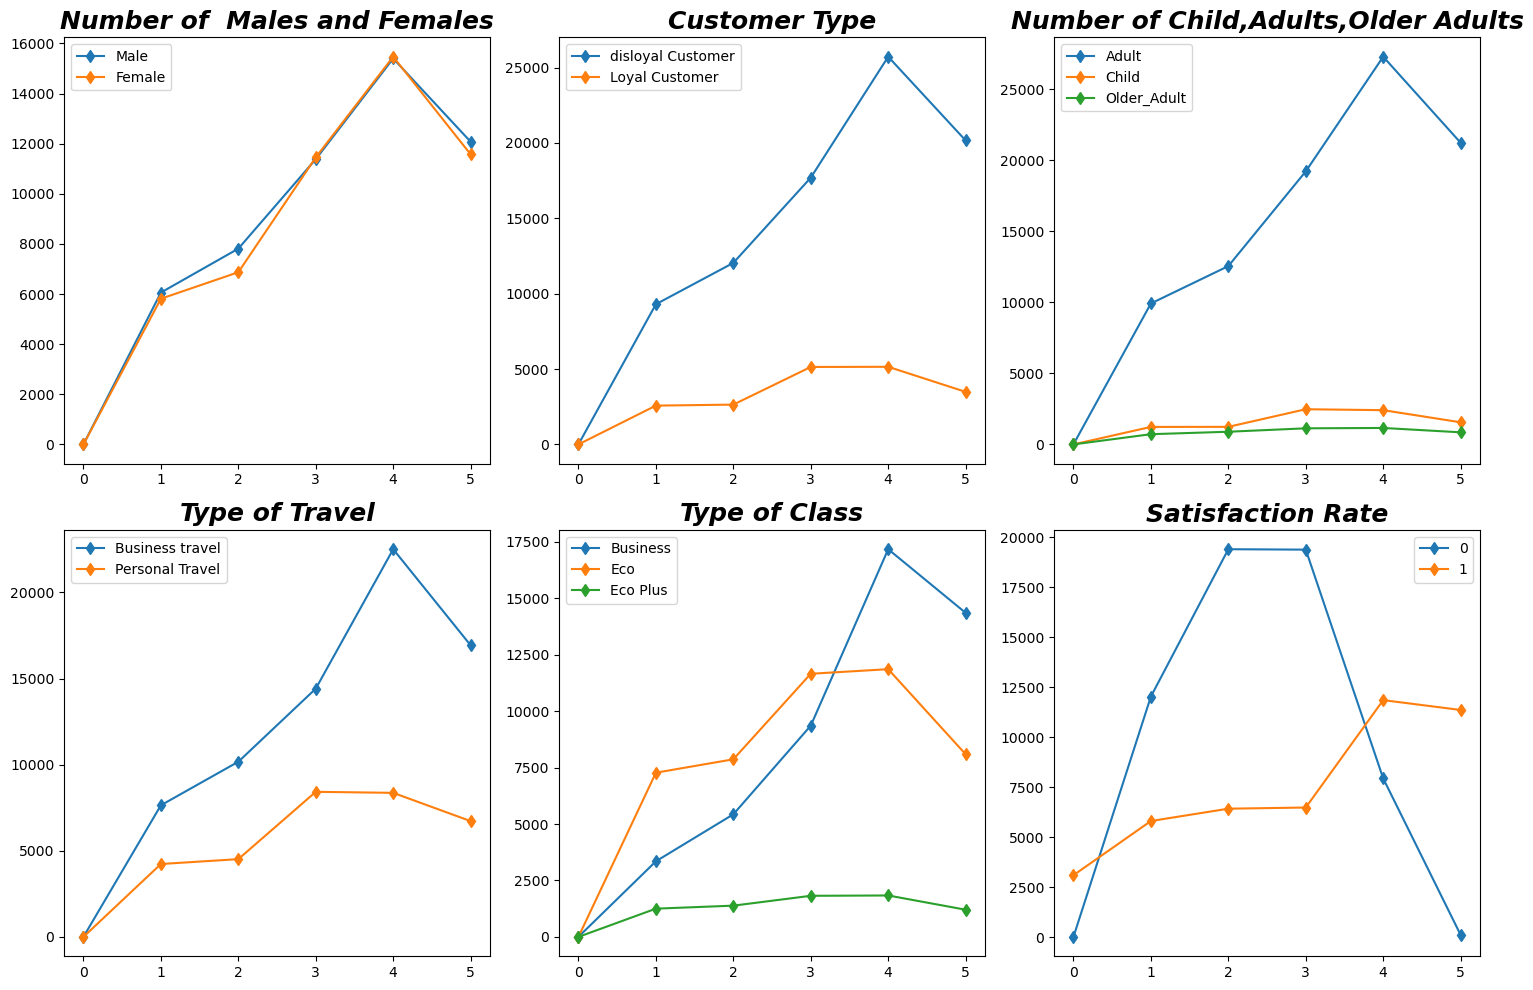

In [69]:
checking('On-board service')

# Leg room service

According to Gender : 

Leg room service    0     1      2      3      4      5
Gender                                                 
Female            408  5382  10150  10300  14499  11988
Male               64  4971   9375   9798  14290  12679

According to Customer Type : 

Leg room service     0     1      2      3      4      5
Customer Type                                           
Loyal Customer     472  8122  15454  15894  24507  20474
disloyal Customer    0  2231   4071   4204   4282   4193

According to Age : 

Leg room service    0     1      2      3      4      5
Who                                                    
Adult             390  8677  16443  16898  25801  22038
Child               0  1071   1914   1994   1964   1966
Older_Adult        82   605   1168   1206   1024    663

According to Type of Travel : 

Leg room service    0     1      2      3      4      5
Type of Travel                                         
Business travel    72  6646  11996  12318  21

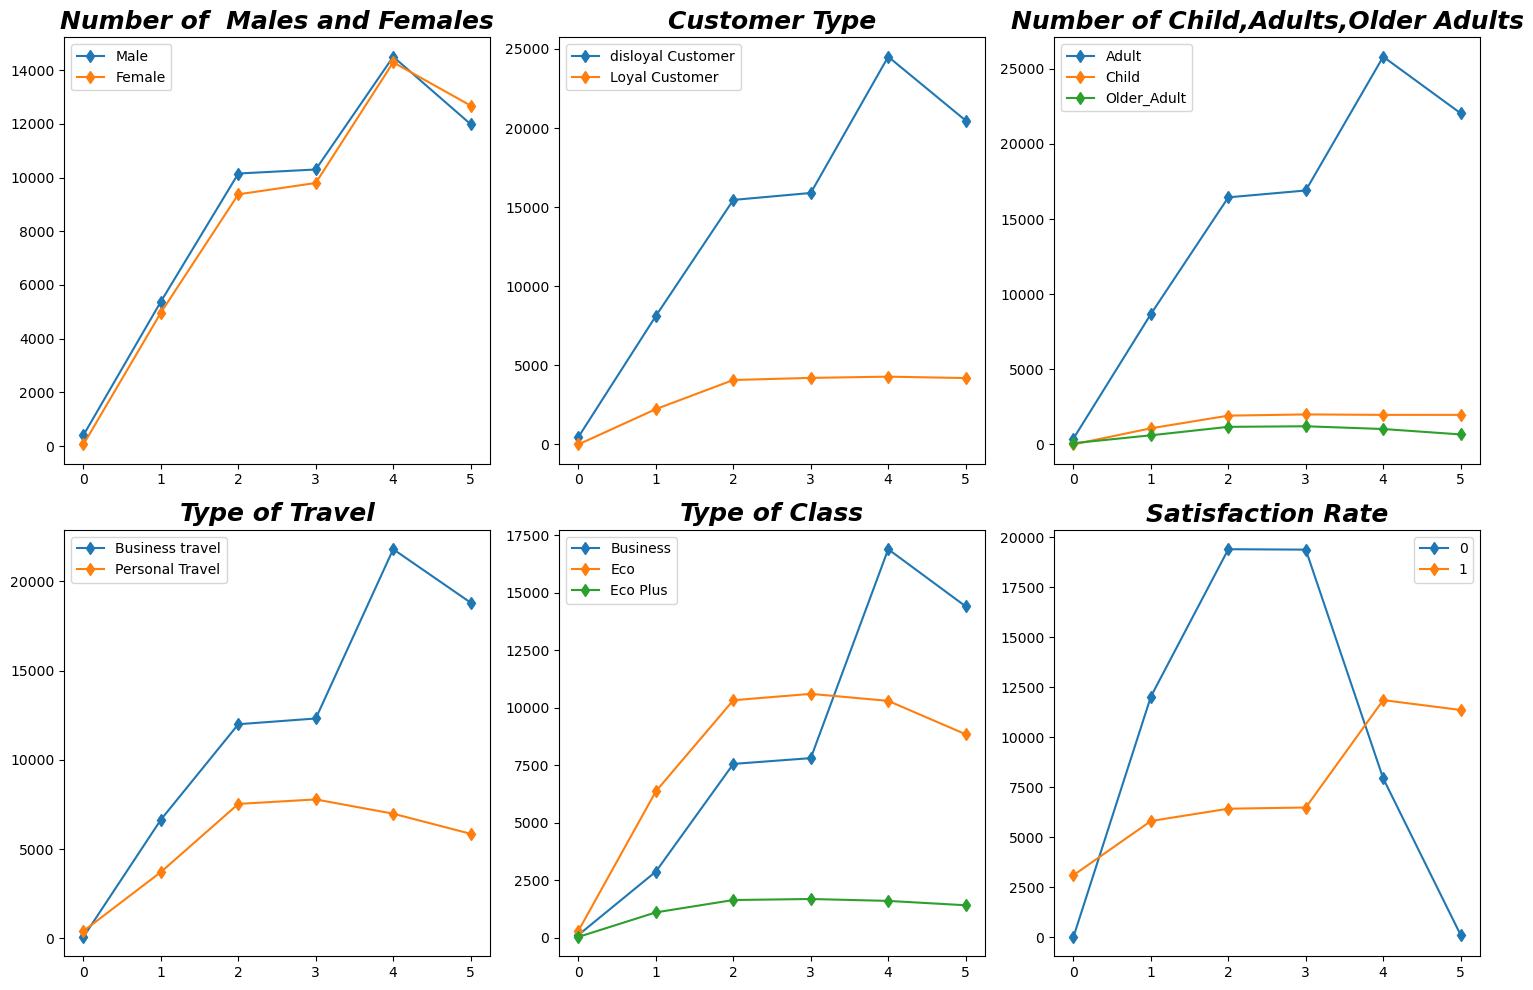

In [71]:
checking('Leg room service')

# Baggage handling

According to Gender : 

Baggage handling     1     2      3      4      5
Gender                                           
Female            4151  6279  10344  18304  13649
Male              3086  5242  10288  19079  13482

According to Customer Type : 

Baggage handling      1     2      3      4      5
Customer Type                                     
Loyal Customer     6218  9984  16285  29967  22469
disloyal Customer  1019  1537   4347   7416   4662

According to Age : 

Baggage handling     1      2      3      4      5
Who                                               
Adult             6190  10001  17390  32635  24031
Child              458    746   2166   3400   2139
Older_Adult        589    774   1076   1348    961

According to Type of Travel : 

Baggage handling     1     2      3      4      5
Type of Travel                                   
Business travel   4427  7850  14252  26496  18630
Personal Travel   2810  3671   6380  10887   8501

According to Class : 

Baggag

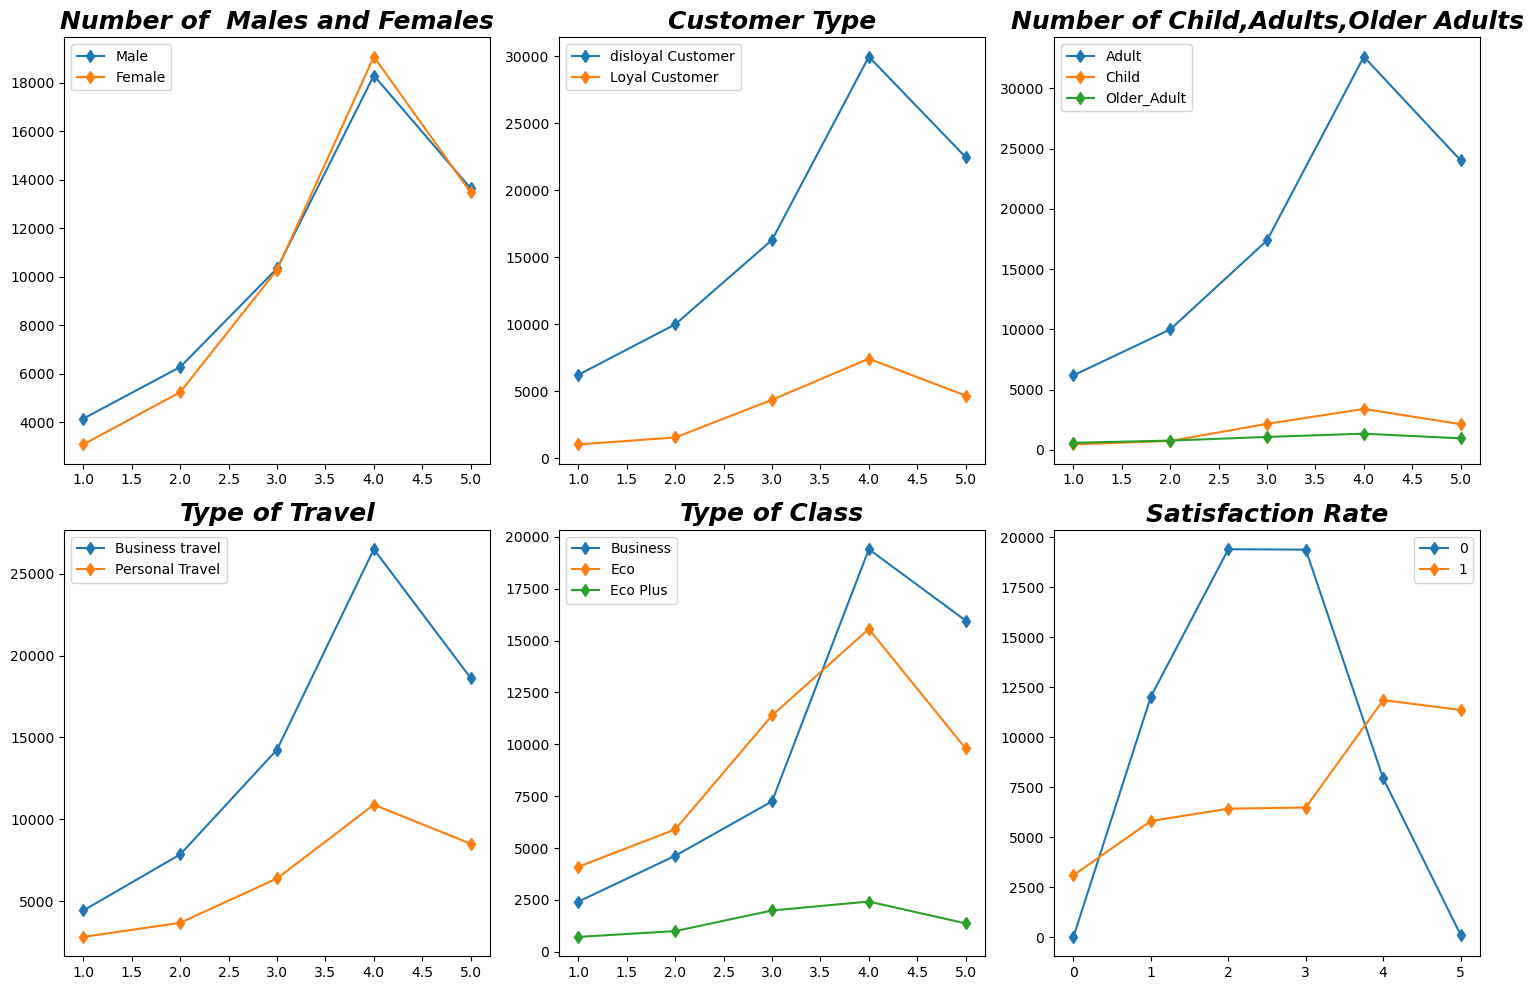

In [73]:
checking('Baggage handling')

# Checkin service

According to Gender : 

Checkin service  0     1     2      3      4      5
Gender                                             
Female           1  6603  6684  14438  14759  10242
Male             0  6287  6209  14008  14296  10377

According to Customer Type : 

Checkin service    0      1      2      3      4      5
Customer Type                                          
Loyal Customer     1  10235  10273  23314  23978  17122
disloyal Customer  0   2655   2620   5132   5077   3497

According to Age : 

Checkin service  0      1      2      3      4      5
Who                                                  
Adult            1  10906  10926  24798  25308  18308
Child            0   1270   1260   2354   2463   1562
Older_Adult      0    714    707   1294   1284    749

According to Type of Travel : 

Checkin service  0     1     2      3      4      5
Type of Travel                                     
Business travel  1  9072  9128  19470  19908  14076
Personal Travel  0  3818  3765 

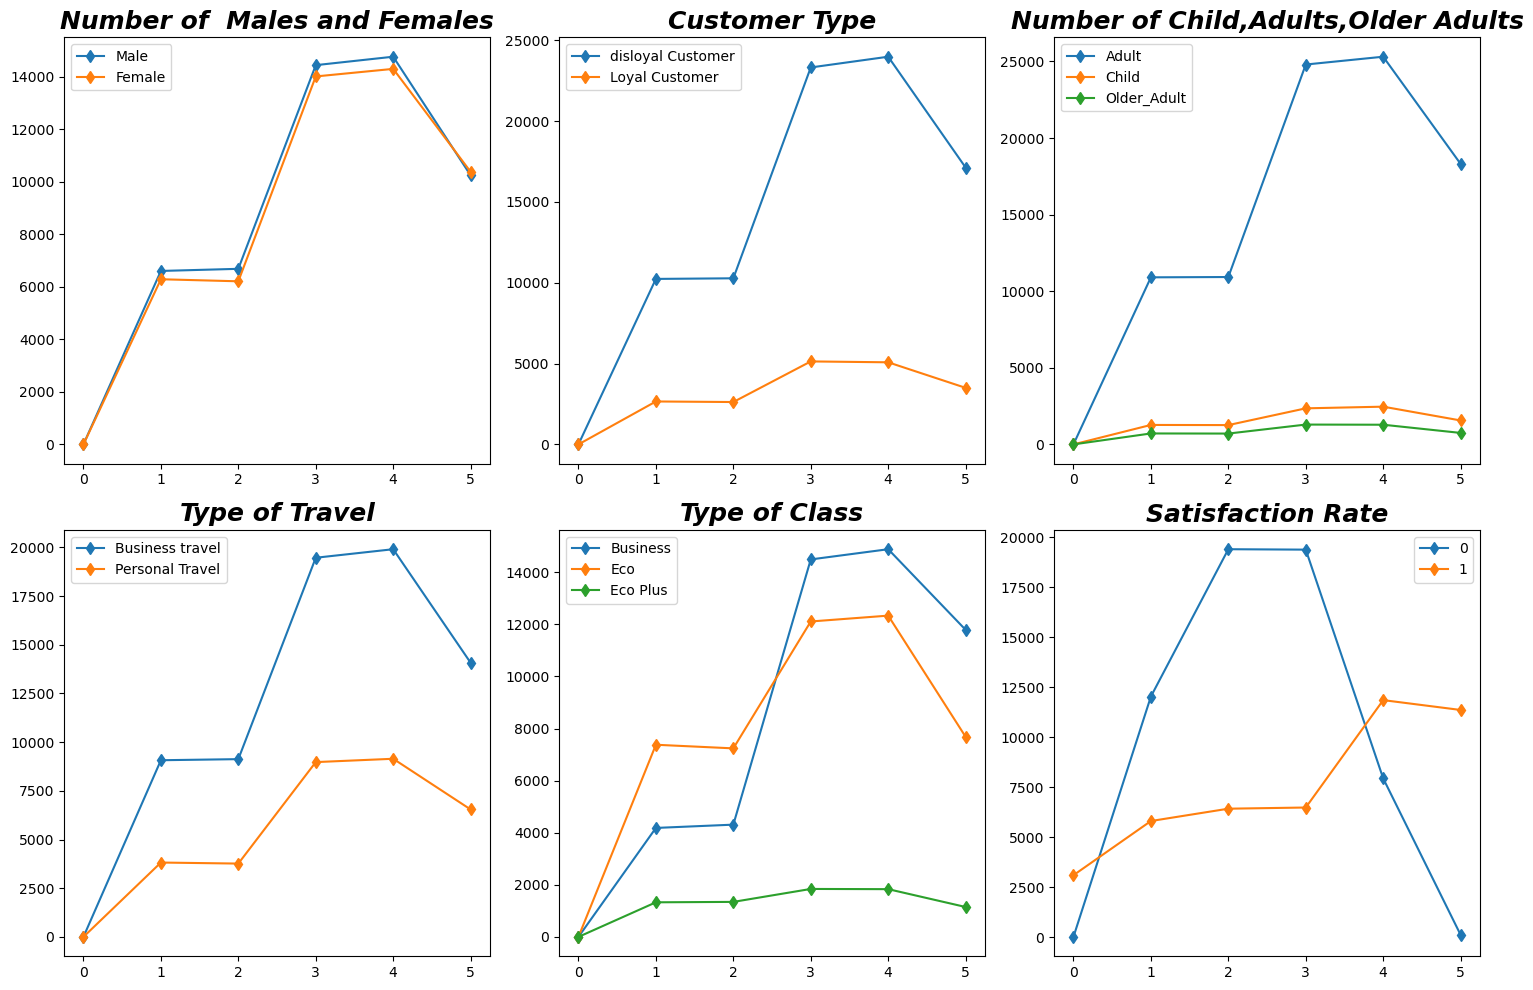

In [75]:
checking('Checkin service')

# Inflight service

According to Gender : 

Inflight service  0     1     2      3      4      5
Gender                                              
Female            2  3994  6296  10288  18643  13504
Male              1  3090  5161  10011  19302  13612

According to Customer Type : 

Inflight service   0     1     2      3      4      5
Customer Type                                        
Loyal Customer     3  6019  9872  16148  30526  22355
disloyal Customer  0  1065  1585   4151   7419   4761

According to Age : 

Inflight service  0     1     2      3      4      5
Who                                                 
Adult             3  6084  9962  17147  33043  24008
Child             0   458   711   2090   3497   2153
Older_Adult       0   542   784   1062   1405    955

According to Type of Travel : 

Inflight service  0     1     2      3      4      5
Type of Travel                                      
Business travel   3  4407  7903  14084  26623  18635
Personal Travel   0  2677  3554   621

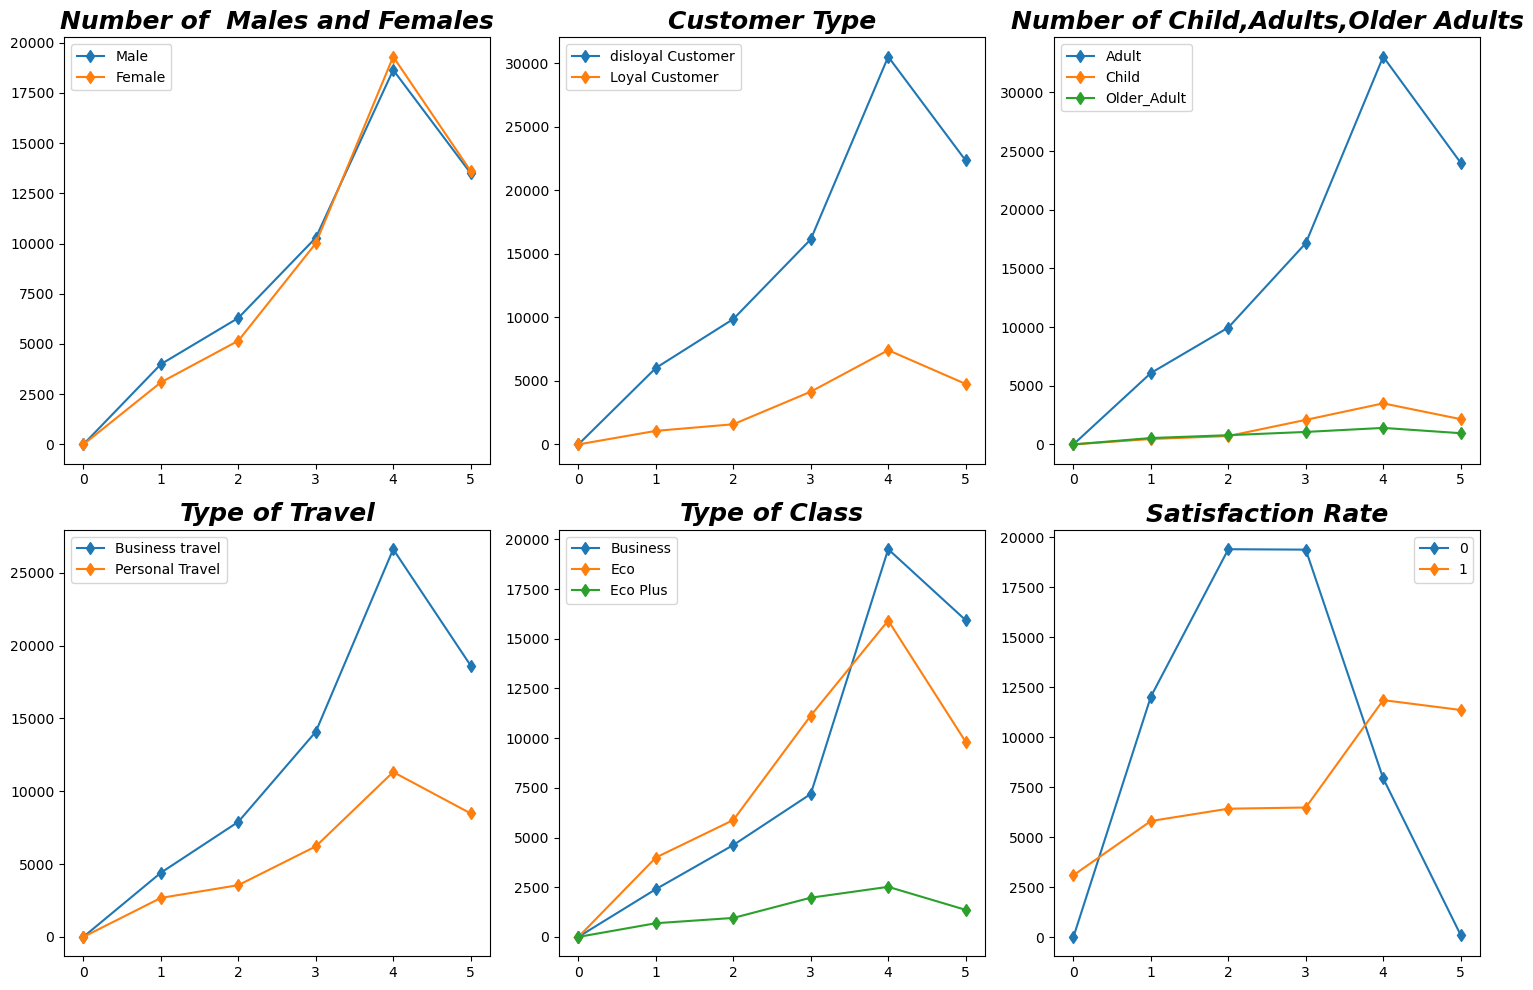

In [77]:
checking('Inflight service')

# Cleanliness

According to Gender : 

Cleanliness  0     1     2      3      4      5
Gender                                         
Female       6  6856  7987  12765  13854  11259
Male         6  6462  8145  11809  13325  11430

According to Customer Type : 

Cleanliness         0     1      2      3      4      5
Customer Type                                          
Loyal Customer     12  9958  12248  20645  23197  18863
disloyal Customer   0  3360   3884   3929   3982   3826

According to Age : 

Cleanliness   0      1      2      3      4      5
Who                                               
Adult        10  11091  13445  21480  23969  20252
Child         2   1484   1870   1868   2007   1678
Older_Adult   0    743    817   1226   1203    759

According to Type of Travel : 

Cleanliness       0     1      2      3      4      5
Type of Travel                                       
Business travel  12  8194  10162  17300  19873  16114
Personal Travel   0  5124   5970   7274   7306   6575

A

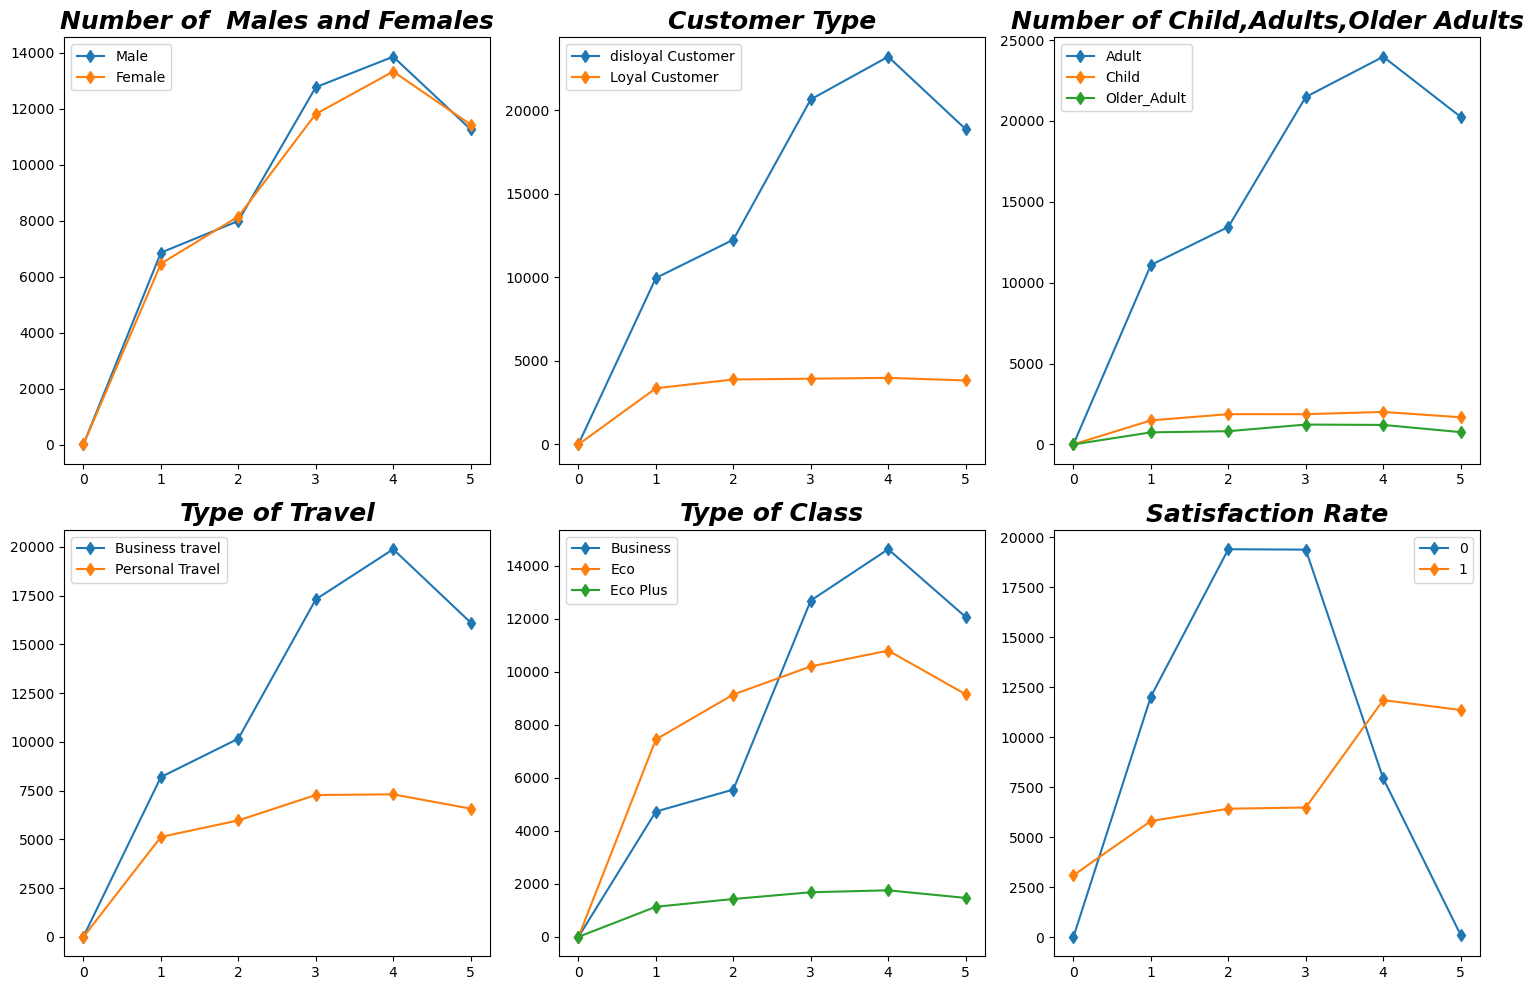

In [79]:
checking('Cleanliness')

# Departure Delay in Minutes

According to Type of Travel : 

In [82]:
pd.crosstab(data['Departure Delay in Minutes'],data['Type of Travel'])

Type of Travel              Business travel  Personal Travel
Departure Delay in Minutes                                  
0                                     40439            18229
1                                      1989              959
2                                      1570              704
3                                      1360              649
4                                      1299              555
...                                     ...              ...
933                                       1                0
978                                       0                1
1017                                      1                0
1305                                      1                0
1592                                      0                1

[446 rows x 2 columns]

In [83]:
pd.crosstab(data['Departure Delay in Minutes'],data['Type of Travel']).describe()

Type of Travel  Business travel  Personal Travel
count                446.000000       446.000000
mean                 160.661435        72.307175
std                 1922.698011       866.869503
min                    0.000000         0.000000
25%                    1.000000         0.250000
50%                    5.000000         2.000000
75%                   33.000000        14.750000
max                40439.000000     18229.000000

According to Class :

In [85]:
pd.crosstab(data['Departure Delay in Minutes'],data['Class'])

Class                       Business    Eco  Eco Plus
Departure Delay in Minutes                           
0                              27986  26487      4195
1                               1463   1280       205
2                               1111   1015       148
3                                978    890       141
4                                929    789       136
...                              ...    ...       ...
933                                1      0         0
978                                0      1         0
1017                               1      0         0
1305                               1      0         0
1592                               0      1         0

[446 rows x 3 columns]

In [86]:
pd.crosstab(data['Departure Delay in Minutes'],data['Class']).describe()

Class      Business           Eco     Eco Plus
count    446.000000    446.000000   446.000000
mean     111.356502    104.809417    16.802691
std     1331.107452   1259.048984   199.432998
min        0.000000      0.000000     0.000000
25%        1.000000      1.000000     0.000000
50%        4.000000      4.000000     1.000000
75%       20.750000     23.000000     4.000000
max    27986.000000  26487.000000  4195.000000

According to Satisfied/Dissatisfied : 

In [88]:
pd.crosstab(data['Departure Delay in Minutes'],data['satisfaction'])

satisfaction                    0      1
Departure Delay in Minutes              
0                           31826  26842
1                            1608   1340
2                            1217   1057
3                            1145    864
4                            1051    803
...                           ...    ...
933                             0      1
978                             1      0
1017                            0      1
1305                            0      1
1592                            1      0

[446 rows x 2 columns]

In [89]:
pd.crosstab(data['Departure Delay in Minutes'],data['satisfaction']).describe()

satisfaction             0             1
count           446.000000    446.000000
mean            132.015695    100.952915
std            1513.788982   1275.850749
min               0.000000      0.000000
25%               1.000000      1.000000
50%               5.000000      3.000000
75%              31.750000     16.000000
max           31826.000000  26842.000000

# Arrival Delay in Minutes

According to Type of Travel : 

In [92]:
pd.crosstab(data['Arrival Delay in Minutes'],data['Type of Travel'])

Type of Travel            Business travel  Personal Travel
Arrival Delay in Minutes                                  
0                                   39971            18188
1                                    1527              684
2                                    1422              642
3                                    1318              634
4                                    1347              560
...                                   ...              ...
952                                     1                0
970                                     0                1
1011                                    1                0
1280                                    1                0
1584                                    0                1

[455 rows x 2 columns]

In [93]:
pd.crosstab(data['Arrival Delay in Minutes'],data['Type of Travel']).describe()

Type of Travel  Business travel  Personal Travel
count                455.000000       455.000000
mean                 157.483516        70.876923
std                 1881.379407       855.919797
min                    0.000000         0.000000
25%                    1.000000         1.000000
50%                    5.000000         2.000000
75%                   33.000000        15.500000
max                39971.000000     18188.000000

According to Class :

In [95]:
pd.crosstab(data['Arrival Delay in Minutes'],data['Class'])

Class                     Business    Eco  Eco Plus
Arrival Delay in Minutes                           
0                            28199  25911      4049
1                             1087    973       151
2                             1007    924       133
3                              948    859       145
4                              950    827       130
...                            ...    ...       ...
952                              1      0         0
970                              0      1         0
1011                             1      0         0
1280                             1      0         0
1584                             0      1         0

[455 rows x 3 columns]

In [96]:
pd.crosstab(data['Arrival Delay in Minutes'],data['Class']).describe()

Class      Business           Eco     Eco Plus
count    455.000000    455.000000   455.000000
mean     109.153846    102.736264    16.470330
std     1327.103402   1219.563635   190.657472
min        0.000000      0.000000     0.000000
25%        1.000000      1.000000     0.000000
50%        3.000000      4.000000     1.000000
75%       22.000000     22.000000     4.000000
max    28199.000000  25911.000000  4049.000000

According to Satisfied/Dissatisfied : 

In [98]:
pd.crosstab(data['Arrival Delay in Minutes'],data['satisfaction'])

satisfaction                  0      1
Arrival Delay in Minutes              
0                         30662  27497
1                          1160   1051
2                          1092    972
3                           993    959
4                           983    924
...                         ...    ...
952                           1      0
970                           1      0
1011                          0      1
1280                          0      1
1584                          1      0

[455 rows x 2 columns]

In [99]:
pd.crosstab(data['Arrival Delay in Minutes'],data['satisfaction']).describe()

satisfaction             0             1
count           455.000000    455.000000
mean            129.404396     98.956044
std            1444.680846   1293.072134
min               0.000000      0.000000
25%               1.000000      1.000000
50%               5.000000      2.000000
75%              31.000000     17.000000
max           30662.000000  27497.000000

# Correlation

In [101]:
data.drop(['id','Flight Distance',],axis=1,inplace=True)

In [102]:
data.select_dtypes(include=['float','int']).corr()

Age  Inflight wifi service  \
Age                                1.000000               0.017859   
Inflight wifi service              0.017859               1.000000   
Departure/Arrival time convenient  0.038125               0.343845   
Ease of Online booking             0.024842               0.715856   
Gate location                     -0.001330               0.336248   
Food and drink                     0.023000               0.134718   
Online boarding                    0.208939               0.456970   
Seat comfort                       0.160277               0.122658   
Inflight entertainment             0.076444               0.209321   
On-board service                   0.057594               0.121500   
Leg room service                   0.040583               0.160473   
Baggage handling                  -0.047529               0.120923   
Checkin service                    0.035482               0.043193   
Inflight service                  -0.049427               0.110441   
Cleanliness                        0.053611               0.132698   
Departure Delay in Minutes        -0.010152              -0.017402   
Arrival Delay in Minutes          -0.012127              -0.019067   
satisfaction                       0.137167               0.284245   

                                   Departure/Arrival time convenient  \
Age                                                         0.038125   
Inflight wifi service                                       0.343845   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.436961   
Gate location                                               0.444757   
Food and drink                                              0.004906   
Online boarding                                             0.070119   
Seat comfort                                                0.011344   
Inflight entertainment                                     -0.004861   
On-board service                                            0.068882   
Leg room service                                            0.012441   
Baggage handling                                            0.072126   
Checkin service                                             0.093333   
Inflight service                                            0.073318   
Cleanliness                                                 0.014292   
Departure Delay in Minutes                                  0.001005   
Arrival Delay in Minutes                                   -0.000864   
satisfaction                                               -0.051601   

                                   Ease of Online booking  Gate location  \
Age                                              0.024842      -0.001330   
Inflight wifi service                            0.715856       0.336248   
Departure/Arrival time convenient                0.436961       0.444757   
Ease of Online booking                           1.000000       0.458655   
Gate location                                    0.458655       1.000000   
Food and drink                                   0.031873      -0.001159   
Online boarding                                  0.404074       0.001688   
Seat comfort                                     0.030014       0.003669   
Inflight entertainment                           0.047032       0.003517   
On-board service                                 0.038833      -0.028373   
Leg room service                                 0.107601      -0.005873   
Baggage handling                                 0.038762       0.002313   
Checkin service                                  0.011081      -0.035427   
Inflight service                                 0.035272       0.001681   
Cleanliness                                      0.016179      -0.003830   
Departure Delay in Minutes                      -0.006371       0.005467   
Arrival Delay in Minutes                        

<Axes: >

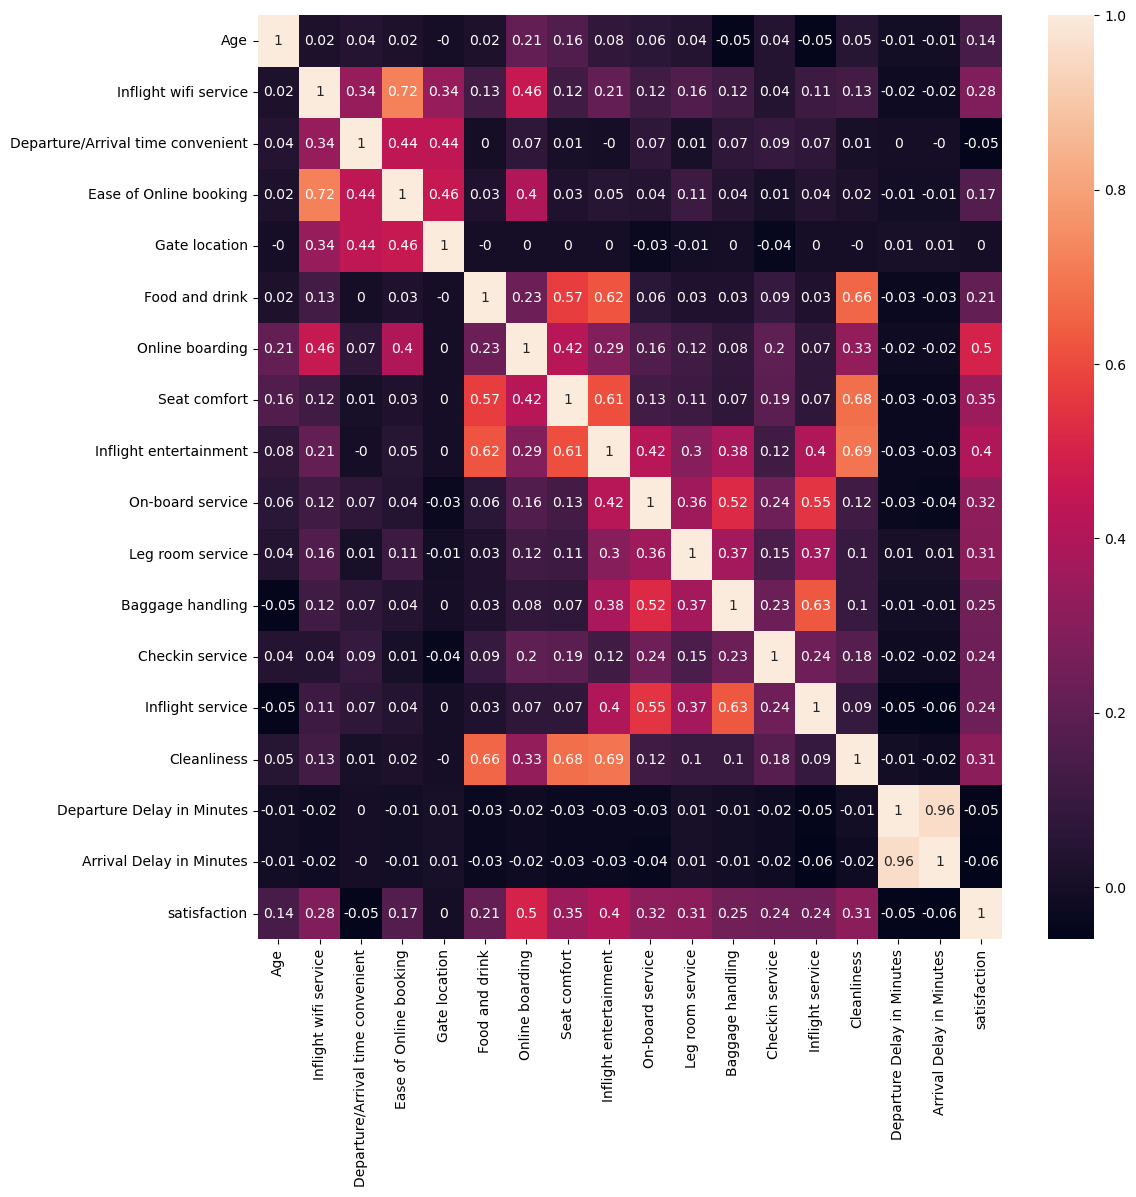

In [103]:
plt.figure(figsize = (12,12))
sns.heatmap(round(data.select_dtypes(include=['float','int']).corr(),2),annot=True)

In [104]:
data.select_dtypes(include=['float','int']).corr()['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057496
Name: satisfaction, dtype: float64

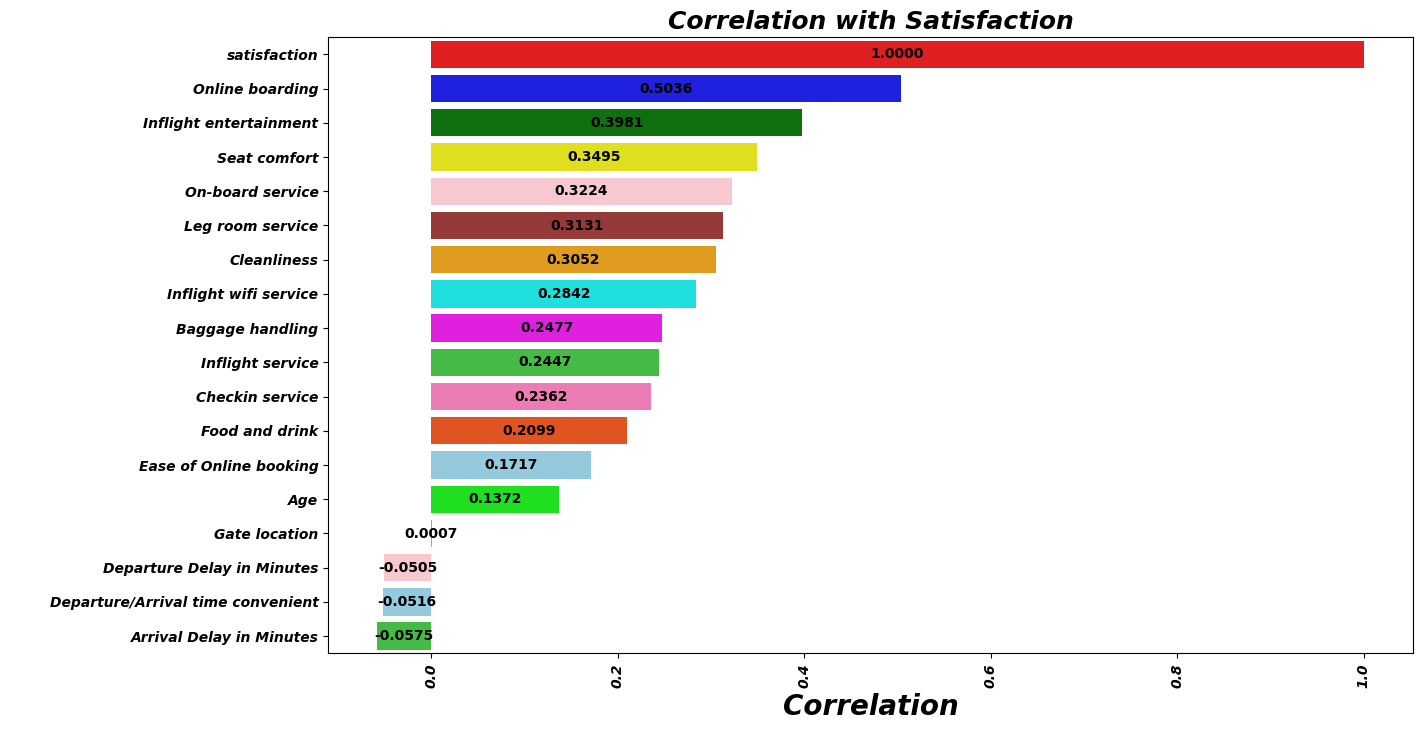

In [105]:
plt.figure(figsize = (14,8))
plt.title("Correlation with Satisfaction",size=18,style='italic',weight='bold')
a2=sns.barplot(data.select_dtypes(include=['float','int']).corr()['satisfaction'].sort_values(ascending=False),orient='h',
  palette=['red','blue','green','yellow','pink','brown','orange','cyan','magenta','limegreen','hotpink','orangered','skyblue','lime','orange','pink','skyblue','limegreen'])
plt.xticks(rotation=90,size = 10,style = 'italic',weight = 'bold',)
plt.yticks(size=10,style='italic',weight='bold')
plt.ylabel(' ',size = 25,style = 'italic',weight = 'bold',)
plt.xlabel('Correlation',size = 20,style = 'italic',weight = 'bold')
for container in a2.containers:
    a2.bar_label(container,label_type='center',fontsize=10,weight='bold',fmt = '%.4f')
    
plt.show()

In [106]:
data.select_dtypes(include=['float','int']).corr()['satisfaction'].sort_values(ascending=False).head(5)

satisfaction              1.000000
Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Name: satisfaction, dtype: float64

In [107]:
data.select_dtypes(include=['float','int']).corr()['satisfaction'].sort_values(ascending=False).tail(5)

Age                                  0.137167
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057496
Name: satisfaction, dtype: float64

# Covariance

In [109]:
data.select_dtypes(include=['float','int']).cov()

Age  Inflight wifi service  \
Age                                228.462128               0.358438   
Inflight wifi service                0.358438               1.763131   
Departure/Arrival time convenient    0.878840               0.696299   
Ease of Online booking               0.525278               1.329731   
Gate location                       -0.025677               0.570433   
Food and drink                       0.462214               0.237829   
Online boarding                      4.261898               0.818853   
Seat comfort                         3.195591               0.214838   
Inflight entertainment               1.540212               0.370495   
On-board service                     1.121562               0.207852   
Leg room service                     0.807001               0.280330   
Baggage handling                    -0.848365               0.189612   
Checkin service                      0.678651               0.072574   
Inflight service                    -0.878327               0.172408   
Cleanliness                          1.063363               0.231223   
Departure Delay in Minutes          -5.866554              -0.883408   
Arrival Delay in Minutes            -7.082860              -0.978292   
satisfaction                         1.027388               0.187030   

                                   Departure/Arrival time convenient  \
Age                                                         0.878840   
Inflight wifi service                                       0.696299   
Departure/Arrival time convenient                           2.325854   
Ease of Online booking                                      0.932245   
Gate location                                               0.866595   
Food and drink                                              0.009948   
Online boarding                                             0.144312   
Seat comfort                                                0.022821   
Inflight entertainment                                     -0.009883   
On-board service                                            0.135343   
Leg room service                                            0.024962   
Baggage handling                                            0.129896   
Checkin service                                             0.180116   
Inflight service                                            0.131456   
Cleanliness                                                 0.028604   
Departure Delay in Minutes                                  0.058604   
Arrival Delay in Minutes                                   -0.050894   
satisfaction                                               -0.038996   

                                   Ease of Online booking  Gate location  \
Age                                              0.525278      -0.025677   
Inflight wifi service                            1.329731       0.570433   
Departure/Arrival time convenient                0.932245       0.866595   
Ease of Online booking                           1.957004       0.819756   
Gate location                                    0.819756       1.632315   
Food and drink                                   0.059282      -0.001968   
Online boarding                                  0.762839       0.002910   
Seat comfort                                     0.055385       0.006183   
Inflight entertainment                           0.087704       0.005989   
On-board service                                 0.069989      -0.046703   
Leg room service                                 0.198034      -0.009872   
Baggage handling                                 0.064035       0.003490   
Checkin service                                  0.019615      -0.057275   
Inflight service                                 0.058011       0.002525   
Cleanliness                                      0.029700      -0.006421   
Departure Delay in Minutes                      -0.340715       0.267039   
Arrival Dela

<Axes: >

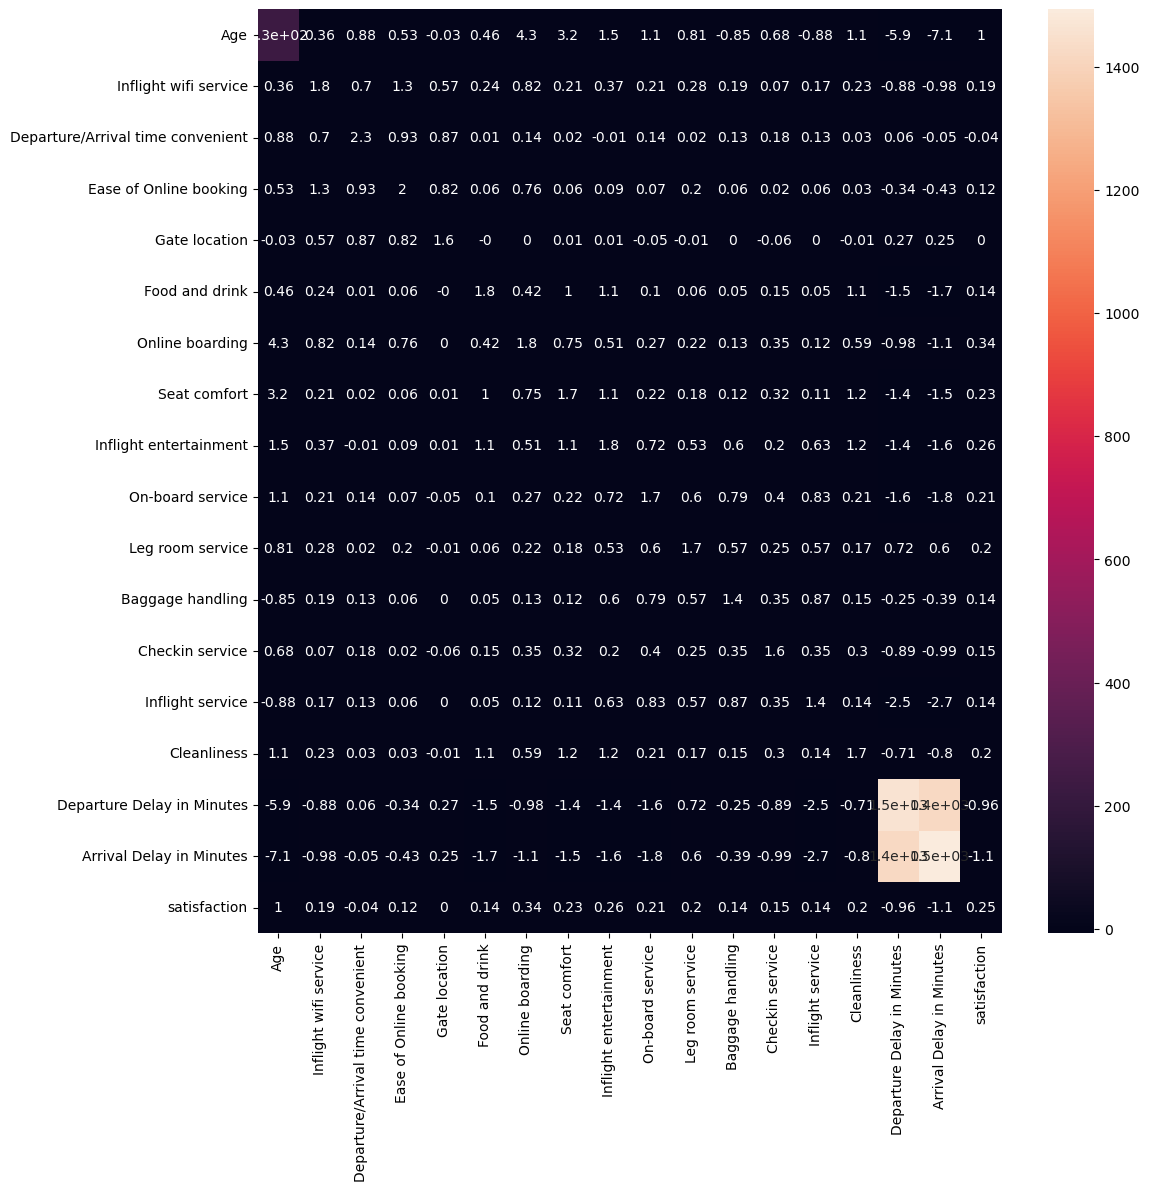

In [110]:
plt.figure(figsize = (12,12))
sns.heatmap(round(data.select_dtypes(include=['float','int']).cov(),2),annot=True)

In [111]:
data.select_dtypes(include=['float','int']).cov()['satisfaction']

Age                                  1.027388
Inflight wifi service                0.187030
Departure/Arrival time convenient   -0.038996
Ease of Online booking               0.119030
Gate location                        0.000432
Food and drink                       0.138313
Online boarding                      0.336745
Seat comfort                         0.228426
Inflight entertainment               0.262937
On-board service                     0.205818
Leg room service                     0.204140
Baggage handling                     0.144979
Checkin service                      0.148093
Inflight service                     0.142582
Cleanliness                          0.198464
Departure Delay in Minutes          -0.956606
Arrival Delay in Minutes            -1.100940
satisfaction                         0.245558
Name: satisfaction, dtype: float64

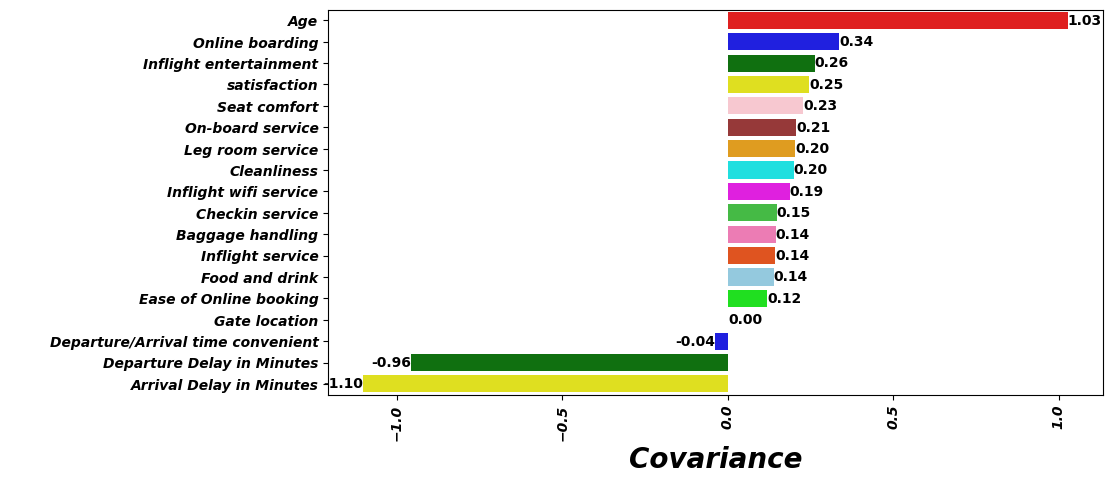

In [112]:
plt.figure(figsize = (10,5))
plt.title
a2=sns.barplot(data.select_dtypes(include=['float','int']).cov()['satisfaction'].sort_values(ascending=False),orient='h',
  palette=['red','blue','green','yellow','pink','brown','orange','cyan','magenta','limegreen','hotpink','orangered','skyblue','lime'])
plt.xticks(rotation=90,size = 10,style = 'italic',weight = 'bold',)
plt.yticks(size=10,style='italic',weight='bold')
plt.ylabel(' ',size = 25,style = 'italic',weight = 'bold',)
plt.xlabel('Covariance',size = 20,style = 'italic',weight = 'bold')
for container in a2.containers:
    a2.bar_label(container,label_type='edge',fontsize=10,weight='bold',fmt = '%.2f')    
plt.show()

In [113]:
data.select_dtypes(include=['float','int']).cov()['satisfaction'].sort_values(ascending=False).head(5)

Age                       1.027388
Online boarding           0.336745
Inflight entertainment    0.262937
satisfaction              0.245558
Seat comfort              0.228426
Name: satisfaction, dtype: float64

In [114]:
data.select_dtypes(include=['float','int']).cov()['satisfaction'].sort_values(ascending=False).tail(5)

Ease of Online booking               0.119030
Gate location                        0.000432
Departure/Arrival time convenient   -0.038996
Departure Delay in Minutes          -0.956606
Arrival Delay in Minutes            -1.100940
Name: satisfaction, dtype: float64